In [106]:
import pandas as pd
import numpy as np  



# Load match data (2023 season)
matches = pd.read_csv("/Users/sadafvaziri/downloads/atp_matches_2023.csv")

# Load odds data (e.g., 2023 odds with B365W, B365L)
odds= pd.read_excel("/Users/sadafvaziri/downloads/2023.xlsx")


# Inspect both
print("🎾 Match columns:", matches.columns.tolist())
print("💰 Odds columns:", odds.columns.tolist())

# Create join key
matches['key'] = (
    pd.to_datetime(matches['tourney_date'], format='%Y%m%d').astype(str) + '_' +
    matches['winner_name'].str.lower().str.replace(' ', '') + '_' +
    matches['loser_name'].str.lower().str.replace(' ', '')
)

odds['key'] = (
    pd.to_datetime(odds['Date']).dt.strftime('%Y-%m-%d') + '_' +
    odds['Winner'].str.lower().str.replace(' ', '') + '_' +
    odds['Loser'].str.lower().str.replace(' ', '')
)




🎾 Match columns: ['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points']
💰 Odds columns: ['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts', 'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets', 'Comment', 'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL', 'AvgW', 'AvgL']


In [107]:
matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,key
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,...,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0,2023-01-02_taylorfritz_matteoberrettini
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,...,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0,2023-01-02_francestiafoe_lorenzomusetti
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,...,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0,2023-01-02_taylorfritz_huberthurkacz
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,...,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0,2023-01-02_francestiafoe_kacperzuk
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,...,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0,2023-01-02_stefanostsitsipas_matteoberrettini


In [108]:
matches.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,2986.000000,2.986000e+03,2986.00000,2986.000000,1250.000000,2969.000000,2986.000000,2986.000000,769.000000,2954.000000,...,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2964.000000,2964.000000,2955.000000,2955.000000
mean,64.901541,2.023057e+07,235.88781,145036.088078,7.821600,187.552375,26.587609,144006.518084,9.690507,186.631686,...,50.658259,34.179751,14.561989,12.495915,4.708703,8.327176,74.961876,1712.911269,114.104907,1104.327242
std,46.314680,3.058956e+02,82.33363,42766.699797,7.204728,6.912431,4.351220,42450.867025,8.099507,6.621530,...,18.851845,14.214984,6.758157,4.165111,3.265831,4.136515,116.119939,1823.309976,181.817105,1180.899962
min,2.000000,2.023010e+07,1.00000,100644.000000,1.000000,71.000000,17.900000,100644.000000,1.000000,170.000000,...,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,32.000000,2.023031e+07,208.00000,106331.000000,3.000000,183.000000,23.900000,106233.000000,4.000000,183.000000,...,37.000000,24.000000,10.000000,9.000000,2.000000,5.000000,17.000000,662.000000,36.000000,532.500000
50%,32.000000,2.023053e+07,275.00000,126205.000000,6.000000,188.000000,26.100000,126205.000000,7.000000,185.000000,...,47.000000,32.000000,14.000000,12.000000,4.000000,8.000000,48.000000,931.000000,67.000000,782.000000
75%,128.000000,2.023082e+07,289.00000,200325.000000,10.000000,193.000000,28.400000,200318.000000,13.000000,191.000000,...,62.000000,43.000000,18.000000,15.000000,6.000000,11.000000,87.000000,2063.750000,111.000000,1122.500000
max,128.000000,2.023113e+07,300.00000,212051.000000,32.000000,208.000000,43.600000,212044.000000,32.000000,208.000000,...,143.000000,101.000000,47.000000,31.000000,20.000000,28.000000,1594.000000,11795.000000,2050.000000,11245.000000


In [109]:
# Convert the integer date (e.g., 20230102) to datetime and back to string format
matches['match_date'] = pd.to_datetime(matches['tourney_date'], format='%Y%m%d')
matches['match_date'] = matches['match_date'].dt.strftime('%Y-%m-%d')

# Ensure it's treated as string and parsed properly

matches['tourney_date'] = matches['tourney_date'].dt.strftime('%Y-%m-%d')



AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
matches['tourney_date'].unique()

array(['2023-01-02', '2023-01-09', '2023-01-16', '2023-02-06',
       '2023-02-13', '2023-02-20', '2023-02-27', '2023-03-06',
       '2023-03-20', '2023-04-03', '2023-04-10', '2023-04-17',
       '2023-04-24', '2023-05-08', '2023-05-22', '2023-05-29',
       '2023-06-12', '2023-06-19', '2023-06-26', '2023-07-03',
       '2023-07-17', '2023-07-24', '2023-07-31', '2023-08-07',
       '2023-08-14', '2023-08-21', '2023-08-28', '2023-09-20',
       '2023-09-25', '2023-09-27', '2023-10-02', '2023-10-16',
       '2023-10-23', '2023-10-30', '2023-11-06', '2023-11-13',
       '2023-11-27', '2023-09-16', '2023-09-13', '2023-09-14',
       '2023-09-15', '2023-09-17', '2023-09-12', '2023-11-26',
       '2023-11-21', '2023-11-22', '2023-11-24', '2023-11-23',
       '2023-11-25', '2023-02-04', '2023-02-03', '2023-02-02'],
      dtype=object)

In [ ]:
odds.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL,key
0,1,Adelaide,Adelaide International 1,2023-01-01,ATP250,Outdoor,Hard,1st Round,3,Giron M.,...,Completed,1.91,1.91,1.93,1.95,1.99,1.95,1.89,1.89,2023-01-01_gironm._gasquetr.
1,1,Adelaide,Adelaide International 1,2023-01-01,ATP250,Outdoor,Hard,1st Round,3,Mcdonald M.,...,Retired,1.36,3.20,1.39,3.25,1.44,3.40,1.36,3.12,2023-01-01_mcdonaldm._galand.e.
2,1,Adelaide,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3,Kecmanovic M.,...,Completed,1.57,2.38,1.58,2.53,1.64,2.53,1.58,2.36,2023-01-02_kecmanovicm._oconnellc.
3,1,Adelaide,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3,Nishioka Y.,...,Completed,3.75,1.29,4.00,1.28,4.00,1.31,3.56,1.29,2023-01-02_nishiokay._runeh.
4,1,Adelaide,Adelaide International 1,2023-01-02,ATP250,Outdoor,Hard,1st Round,3,Popyrin A.,...,Completed,6.50,1.11,6.20,1.15,6.75,1.18,6.04,1.13,2023-01-02_popyrina._auger-aliassimef.


In [ ]:
odds.describe()

,ATP,Date,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,...,Wsets,Lsets,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
count,2703.000000,2703,2703.000000,2701.000000,2696.000000,2701.000000,2696.000000,2684.000000,2684.000000,2660.000000,...,2684.000000,2684.000000,2698.000000,2698.000000,2691.000000,2691.000000,2698.000000,2698.000000,2698.000000,2698.000000
mean,32.782094,2023-06-05 15:26:58.201997568,3.375139,61.974824,113.494065,1757.111440,1140.829006,5.807377,4.162444,5.753008,...,2.155738,0.434054,1.867325,3.353921,1.919955,3.619796,1.973514,3.759970,1.853347,3.220486
min,1.000000,2023-01-01 00:00:00,3.000000,1.000000,1.000000,4.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.010000,1.010000,1.020000,1.010000,1.030000,1.010000,1.010000
25%,19.000000,2023-03-22 00:00:00,3.000000,16.000000,35.000000,674.000000,567.750000,6.000000,3.000000,6.000000,...,2.000000,0.000000,1.300000,1.685000,1.310000,1.750000,1.332500,1.790000,1.300000,1.710000
50%,31.000000,2023-06-02 00:00:00,3.000000,46.000000,66.000000,951.000000,798.000000,6.000000,4.000000,6.000000,...,2.000000,0.000000,1.570000,2.380000,1.610000,2.470000,1.640000,2.550000,1.570000,2.380000
75%,49.000000,2023-08-16 00:00:00,3.000000,82.000000,107.000000,2150.000000,1147.000000,6.000000,6.000000,6.000000,...,2.000000,1.000000,2.175000,3.500000,2.190000,3.765000,2.250000,3.897500,2.130000,3.537500
max,64.000000,2023-11-19 00:00:00,5.000000,1035.000000,4915.000000,11445.000000,11445.000000,7.000000,7.000000,7.000000,...,3.000000,2.000000,23.000000,67.000000,30.500000,64.190000,30.500000,67.000000,19.000000,34.680000
std,17.710839,NaN,0.780880,75.820100,222.486133,1858.883227,1183.068653,1.230046,1.808290,1.301303,...,0.446505,0.565938,0.993034,3.410576,1.109373,4.066680,1.146886,4.320032,0.929353,2.742918


In [ ]:
matches['tourney_name_clean'] = matches['tourney_name'].str.lower().str.strip()
odds['tourney_name_clean'] = odds['Tournament'].str.lower().str.strip()


In [ ]:
common_tourneys = set(matches['tourney_name_clean']).intersection(set(odds['tourney_name_clean']))
print(f"🎾 Common tournaments: {len(common_tourneys)}")


🎾 Common tournaments: 5


In [ ]:
matches_filtered = matches[matches['tourney_name_clean'].isin(common_tourneys)]
odds_filtered = odds[odds['tourney_name_clean'].isin(common_tourneys)]

# Then build your match_key and merge from here


In [ ]:
matches_filtered['Winner_clean'] = matches_filtered['winner_name'].str.lower().str.strip()
matches_filtered['Loser_clean'] = matches_filtered['loser_name'].str.lower().str.strip()


/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/914187228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_filtered['Winner_clean'] = matches_filtered['winner_name'].str.lower().str.strip()
/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/914187228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_filtered['Loser_clean'] = matches_filtered['loser_name'].str.lower().str.strip()


In [ ]:
matches_filtered['match_key'] = (
    matches_filtered['Winner_clean'] + '_' +
    matches_filtered['Loser_clean'] + '_' +
    matches_filtered['match_date'].astype(str).str.strip()
)



/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/388014501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_filtered['match_key'] = (


In [ ]:
odds_filtered['Winner_clean'] = odds_filtered['Winner'].str.lower().str.strip()
odds_filtered['Loser_clean'] = odds_filtered['Loser'].str.lower().str.strip()

odds_filtered['match_key'] = (
    odds_filtered['Winner_clean'] + '_' +
    odds_filtered['Loser_clean'] + '_' +
    odds_filtered['Date'].astype(str).str.strip()
)


/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/3519581511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odds_filtered['Winner_clean'] = odds_filtered['Winner'].str.lower().str.strip()
/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/3519581511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odds_filtered['Loser_clean'] = odds_filtered['Loser'].str.lower().str.strip()
/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/3519581511.py:4: SettingWithCopyWarn

In [ ]:
merged_df = matches_filtered.merge(
    odds_filtered,
    on='match_key',
    how='inner',
    suffixes=('_match', '_odds')
)

print("✅ Merged shape:", merged_df.shape)



✅ Merged shape: (0, 96)


In [ ]:
print("🔑 Sample match keys from matches:")
print(matches_filtered['match_key'].head(10).tolist())

print("\n🔑 Sample match keys from odds:")
print(odds_filtered['match_key'].head(10).tolist())


🔑 Sample match keys from matches:
['rafael nadal_jack draper_2023-01-16', 'mackenzie mcdonald_brandon nakashima_2023-01-16', 'dalibor svrcina_jaume munar_2023-01-16', 'yoshihito nishioka_mikael ymer_2023-01-16', 'karen khachanov_bernabe zapata miralles_2023-01-16', 'jason kubler_sebastian baez_2023-01-16', 'juncheng shang_oscar otte_2023-01-16', 'frances tiafoe_daniel altmaier_2023-01-16', 'hubert hurkacz_pedro martinez_2023-01-16', 'lorenzo sonego_nuno borges_2023-01-16']

🔑 Sample match keys from odds:
['moutet c._wu y._2023-01-16', 'watanuki y._rinderknech a._2023-01-16', 'van de zandschulp b._ivashka i._2023-01-16', 'etcheverry t._barrere g._2023-01-16', 'sinner j._edmund k._2023-01-16', 'cerundolo f._pella g._2023-01-16', 'shang j._otte o._2023-01-16', 'hurkacz h._martinez p._2023-01-16', 'korda s._garin c._2023-01-16', 'nishioka y._ymer m._2023-01-16']


In [ ]:
print(odds_filtered.columns)


Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL', 'key', 'tourney_name_clean', 'Winner_clean',
       'Loser_clean', 'match_key'],
      dtype='object')


In [ ]:
merged_df = matches_filtered.merge(
    odds_filtered,
    on='match_key',
    how='inner',
    suffixes=('_match', '_odds')
)

print("✅ Merged shape:", merged_df.shape)
merged_df.head()


✅ Merged shape: (0, 96)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,PSW,PSL,MaxW,MaxL,AvgW,AvgL,key_odds,tourney_name_clean_odds,Winner_clean_odds,Loser_clean_odds


In [ ]:
from fuzzywuzzy import process

# Get all full names from matches
all_full_names = pd.concat([
    matches_filtered['winner_name'], 
    matches_filtered['loser_name']
]).str.lower().unique().tolist()

# Build mapping: initials → full name
def fuzzy_name_map(short_name):
    if pd.isnull(short_name):
        return None
    match, score = process.extractOne(short_name.lower(), all_full_names)
    return match if score > 85 else None  # adjust threshold if needed

# Apply fuzzy matching to odds names
odds_filtered['Winner_clean'] = odds_filtered['Winner'].apply(fuzzy_name_map)
odds_filtered['Loser_clean'] = odds_filtered['Loser'].apply(fuzzy_name_map)


/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/1075690819.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odds_filtered['Winner_clean'] = odds_filtered['Winner'].apply(fuzzy_name_map)
/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/1075690819.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odds_filtered['Loser_clean'] = odds_filtered['Loser'].apply(fuzzy_name_map)


In [ ]:
print(odds_filtered[['Winner', 'Winner_clean']].drop_duplicates().head(10))
print(odds_filtered[['Loser', 'Loser_clean']].drop_duplicates().head(10))


                   Winner             Winner_clean
112             Moutet C.          corentin moutet
113           Watanuki Y.          yosuke watanuki
114  Van De Zandschulp B.  botic van de zandschulp
115         Etcheverry T.  tomas martin etcheverry
116             Sinner J.            jannik sinner
117          Cerundolo F.      francisco cerundolo
118              Shang J.           juncheng shang
119            Hurkacz H.           hubert hurkacz
120              Korda S.          sebastian korda
121           Nishioka Y.       yoshihito nishioka
              Loser         Loser_clean
112           Wu Y.           yibing wu
113  Rinderknech A.  arthur rinderknech
114      Ivashka I.                None
115      Barrere G.    gregoire barrere
116       Edmund K.                None
117        Pella G.         guido pella
118         Otte O.          oscar otte
119     Martinez P.                None
120        Garin C.      cristian garin
121         Ymer M.         mikael ymer

In [ ]:
def fuzzy_name_map(short_name):
    if pd.isnull(short_name):
        return None
    match, score = process.extractOne(short_name.lower(), all_full_names)
    return match if score > 75 else None  # lowered from 85 to 75


In [ ]:
odds_filtered['Winner_clean'] = odds_filtered['Winner'].apply(fuzzy_name_map)
odds_filtered['Loser_clean'] = odds_filtered['Loser'].apply(fuzzy_name_map)


/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/2738746618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odds_filtered['Winner_clean'] = odds_filtered['Winner'].apply(fuzzy_name_map)
/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/2738746618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odds_filtered['Loser_clean'] = odds_filtered['Loser'].apply(fuzzy_name_map)


In [ ]:
odds_filtered['match_key'] = (
    odds_filtered['Winner_clean'] + '_' +
    odds_filtered['Loser_clean'] + '_' +
    odds_filtered['Date'].astype(str).str.strip()
)


/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/2005824159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odds_filtered['match_key'] = (


In [ ]:
common_keys = set(matches_filtered['match_key']) & set(odds_filtered['match_key'])
print("🔑 Overlapping match keys:", len(common_keys))


🔑 Overlapping match keys: 88


In [ ]:
merged_df = matches_filtered.merge(
    odds_filtered,
    on='match_key',
    how='inner',
    suffixes=('_match', '_odds')
)

print("✅ Merged shape:", merged_df.shape)


✅ Merged shape: (88, 96)


In [ ]:
#### Evaluate betting accuracy
####Compare whether the favorite actually won based on B365 odds:


merged_df['b365_favorite'] = merged_df.apply(
    lambda row: row['Winner_clean_match'] if row['B365W'] < row['B365L'] else row['Loser_clean_match'], axis=1
)

merged_df['favorite_won'] = (merged_df['b365_favorite'] == merged_df['Winner_clean_match']).astype(int)

accuracy = merged_df['favorite_won'].mean()

print(f"✅ % of favorites who won: {accuracy:.2%}")



✅ % of favorites who won: 50.00%


In [ ]:
print(merged_df.columns.tolist())


['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points', 'key_match', 'match_date', 'tourney_name_clean_match', 'mapped_tourney', 'Winner_clean_match', 'Loser_clean_match', 'match_key', 'ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts', 'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets', 'Comment', 'B365

In [ ]:
###1. 🧨 How often did the underdog win big?
###Find upsets where the winner had higher odds (i.e., B365W > B365L):

upsets = merged_df[merged_df['favorite_won'] == 0]
print("🔻 Number of upsets:", len(upsets))

# Show top 5 biggest upsets
upsets['odds_diff'] = upsets['B365W'] - upsets['B365L']
upsets.sort_values(by='odds_diff', ascending=False)[
    ['tourney_name', 'Winner_clean_match', 'Loser_clean_match', 'B365W', 'B365L']
].head()


🔻 Number of upsets: 44


/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/3765031374.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upsets['odds_diff'] = upsets['B365W'] - upsets['B365L']


,tourney_name,Winner_clean_match,Loser_clean_match,B365W,B365L
79,Us Open,titouan droguet,lorenzo musetti,6.50,1.11
55,Wimbledon,michael mmoh,felix auger aliassime,6.50,1.11
75,Us Open,roberto carballes baena,holger rune,6.00,1.13
28,Australian Open,alex molcan,stan wawrinka,3.75,1.29
19,Australian Open,lloyd harris,lorenzo musetti,3.40,1.33


In [ ]:
# Add a column for favorite (based on B365 odds)
merged_df['b365_favorite'] = merged_df.apply(
    lambda row: row['Winner_clean_match'] if row['B365W'] < row['B365L'] else row['Loser_clean_match'], axis=1
)

# Add a column for whether favorite won
merged_df['favorite_won'] = (merged_df['b365_favorite'] == merged_df['Winner_clean_match']).astype(int)

# Add a column for whether the winner was the underdog
merged_df['underdog_win'] = (merged_df['favorite_won'] == 0).astype(int)

# Filter only the upsets
upsets = merged_df[merged_df['underdog_win'] == 1].copy()
print("✅ Number of upsets:", len(upsets))


✅ Number of upsets: 44


In [ ]:
# Convert match_date to datetime if needed
merged_df['match_date'] = pd.to_datetime(merged_df['match_date'])

# Sort by player and match date
merged_df = merged_df.sort_values(by=['Winner_clean_match', 'match_date'])

# Shift previous odds for comparison
merged_df['prev_match_key'] = merged_df.groupby('Winner_clean_match')['match_key'].shift(1)
merged_df['prev_b365w'] = merged_df.groupby('Winner_clean_match')['B365W'].shift(1)

# For each match, calculate change in odds from last match
merged_df['odds_change_from_last'] = merged_df['prev_b365w'] - merged_df['B365W']


In [ ]:
# Merge upset info onto full dataset
merged_df['won_last_as_underdog'] = merged_df['prev_match_key'].isin(upsets['match_key'])

# Compare average odds shift
avg_shift = merged_df[merged_df['won_last_as_underdog'] == True]['odds_change_from_last'].mean()

print(f"📉 Average odds shift after upset win: {avg_shift:.3f}")


📉 Average odds shift after upset win: 0.324


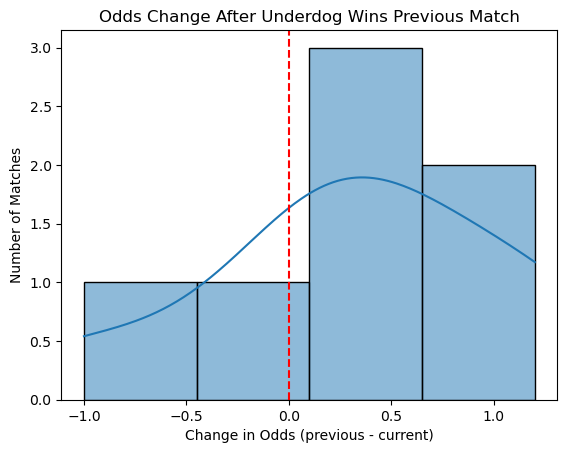

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=merged_df[merged_df['won_last_as_underdog'] == True],
             x='odds_change_from_last', kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Odds Change After Underdog Wins Previous Match')
plt.xlabel('Change in Odds (previous - current)')
plt.ylabel('Number of Matches')
plt.show()


In [ ]:
# Flag protected ranking entries (returning from injury)
merged_df['winner_returning_injury'] = (merged_df['winner_entry'] == 'PR').astype(int)
merged_df['loser_returning_injury'] = (merged_df['loser_entry'] == 'PR').astype(int)

print("✅ Injury return cases (winners):", merged_df['winner_returning_injury'].sum())
print("✅ Injury return cases (losers):", merged_df['loser_returning_injury'].sum())


✅ Injury return cases (winners): 0
✅ Injury return cases (losers): 0


In [ ]:
# Remove overround (bookmaker margin) using basic normalization
merged_df['implied_prob_w'] = 1 / merged_df['B365W']
merged_df['implied_prob_l'] = 1 / merged_df['B365L']

# Normalize
merged_df['prob_sum'] = merged_df['implied_prob_w'] + merged_df['implied_prob_l']
merged_df['implied_prob_w'] /= merged_df['prob_sum']
merged_df['implied_prob_l'] /= merged_df['prob_sum']


In [ ]:
# Bin into 10% ranges
merged_df['prob_bin'] = pd.cut(merged_df['implied_prob_w'], bins=np.arange(0, 1.1, 0.1))

# Compare predicted vs actual win rates
calibration = merged_df.groupby('prob_bin').agg(
    avg_implied_prob=('implied_prob_w', 'mean'),
    actual_win_rate=('favorite_won', 'mean'),
    count=('favorite_won', 'count')
).dropna().reset_index()

print(calibration)


     prob_bin  avg_implied_prob  actual_win_rate  count
0  (0.1, 0.2]          0.150069              0.0      3
1  (0.2, 0.3]          0.286375              0.0      5
2  (0.3, 0.4]          0.366313              0.0     22
3  (0.4, 0.5]          0.453496              0.0     14
4  (0.5, 0.6]          0.563313              1.0      5
5  (0.6, 0.7]          0.647638              1.0     10
6  (0.7, 0.8]          0.733853              1.0      9
7  (0.8, 0.9]          0.854562              1.0     12
8  (0.9, 1.0]          0.924932              1.0      8


/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/3864500436.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = merged_df.groupby('prob_bin').agg(


/Users/sadafvaziri/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


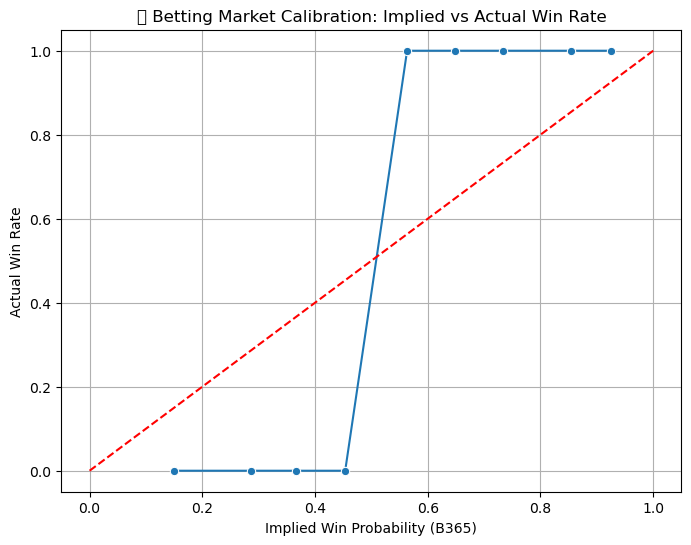

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(data=calibration, x='avg_implied_prob', y='actual_win_rate', marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Perfectly calibrated line
plt.title('📈 Betting Market Calibration: Implied vs Actual Win Rate')
plt.xlabel('Implied Win Probability (B365)')
plt.ylabel('Actual Win Rate')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Create features
merged_df['rank_diff'] = merged_df['WRank'] - merged_df['LRank']
X = merged_df[['B365W', 'B365L', 'rank_diff']].dropna()
y = merged_df.loc[X.index, 'favorite_won']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("📈 AUC:", roc_auc_score(y_test, y_prob))
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))


📊 Accuracy: 0.9259259259259259
📈 AUC: 0.9829545454545454

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.94      0.94      0.94        16

    accuracy                           0.93        27
   macro avg       0.92      0.92      0.92        27
weighted avg       0.93      0.93      0.93        27



In [ ]:
def bet_profit(row, strategy):
    if strategy == 'favorite':
        if row['favorite_won']:
            return (row['B365W'] if row['B365W'] < row['B365L'] else row['B365L']) - 1
        else:
            return -1
    elif strategy == 'underdog':
        if not row['favorite_won']:
            return (row['B365W'] if row['B365W'] > row['B365L'] else row['B365L']) - 1
        else:
            return -1
    return 0

merged_df['profit_favorite'] = merged_df.apply(lambda r: bet_profit(r, 'favorite'), axis=1)
merged_df['profit_underdog'] = merged_df.apply(lambda r: bet_profit(r, 'underdog'), axis=1)

print("📉 Total profit (betting favorite):", merged_df['profit_favorite'].sum())
print("📈 Total profit (betting underdog):", merged_df['profit_underdog'].sum())


📉 Total profit (betting favorite): -31.48
📈 Total profit (betting underdog): 34.34


In [ ]:
# Target: 1 if underdog won
merged_df['underdog_win'] = (merged_df['favorite_won'] == 0).astype(int)

# Features to include
merged_df['rank_diff'] = merged_df['WRank'] - merged_df['LRank']
merged_df['seed_diff'] = merged_df['winner_seed'].fillna(0) - merged_df['loser_seed'].fillna(0)

features = ['B365W', 'B365L', 'WRank', 'LRank', 'rank_diff', 'seed_diff']
X = merged_df[features].dropna()
y = merged_df.loc[X.index, 'underdog_win']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("🧪 Classification Report:\n", classification_report(y_test, y_pred))
print("🎯 AUC:", roc_auc_score(y_test, y_proba))


🧪 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

🎯 AUC: 1.0


In [ ]:
# Flag major upsets
merged_df['major_upset'] = (merged_df['underdog_win'] == 1) & (merged_df[['B365W', 'B365L']].max(axis=1) > 4)

# Pull tournaments where it happened
shock_tournaments = merged_df[merged_df['major_upset']]['tourney_id'].unique()

# For each tourney, plot avg odds for top seeds before vs after the upset
# You'll need to extract round order and sort by match_date


In [ ]:
# Define groups
merged_df['rank_bucket'] = pd.cut(merged_df['WRank'], bins=[0, 20, 50, 100, 1000], labels=['Top 20', '20–50', '50–100', '100+'])

# Avg upset rate per bucket
group_upsets = merged_df.groupby('rank_bucket')['underdog_win'].mean()

print("📊 Upset frequency by rank group:")
print(group_upsets)


📊 Upset frequency by rank group:
rank_bucket
Top 20    0.000000
20–50     0.300000
50–100    0.689655
100+      0.782609
Name: underdog_win, dtype: float64


/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/458014652.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_upsets = merged_df.groupby('rank_bucket')['underdog_win'].mean()


In [ ]:
# Shift win result by player
merged_df = merged_df.sort_values(by=['Winner_clean_match', 'match_date'])
merged_df['won_last_as_underdog'] = merged_df.groupby('Winner_clean_match')['underdog_win'].shift(1)

# Check win rate after underdog win vs normal
next_win_rate = merged_df.groupby('won_last_as_underdog')['favorite_won'].mean()
print("📈 Win rate after prior upset win:", next_win_rate)


📈 Win rate after prior upset win: won_last_as_underdog
0.0    0.285714
1.0    0.428571
Name: favorite_won, dtype: float64


/Users/sadafvaziri/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


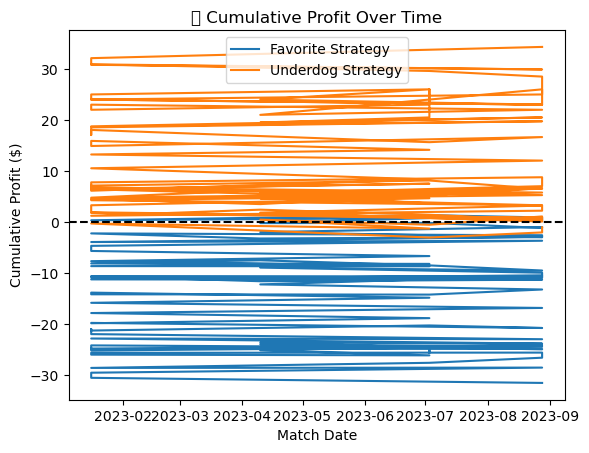

In [ ]:
merged_df['cum_profit_fav'] = merged_df['profit_favorite'].cumsum()
merged_df['cum_profit_udg'] = merged_df['profit_underdog'].cumsum()

plt.plot(merged_df['match_date'], merged_df['cum_profit_fav'], label='Favorite Strategy')
plt.plot(merged_df['match_date'], merged_df['cum_profit_udg'], label='Underdog Strategy')
plt.axhline(0, linestyle='--', color='black')
plt.legend()
plt.title("📈 Cumulative Profit Over Time")
plt.xlabel("Match Date")
plt.ylabel("Cumulative Profit ($)")
plt.show()


In [ ]:
# Create features
merged_df['rank_diff'] = merged_df['WRank'] - merged_df['LRank']
merged_df['seed_diff'] = merged_df['winner_seed'].fillna(0) - merged_df['loser_seed'].fillna(0)
merged_df['odds_diff'] = merged_df['B365L'] - merged_df['B365W']

# Define target
merged_df['favorite_won'] = (merged_df['b365_favorite'] == merged_df['Winner_clean_match']).astype(int)

# Features and target
features = ['WRank', 'LRank', 'rank_diff', 'seed_diff', 'B365W', 'B365L', 'odds_diff']
X = merged_df[features].dropna()
y = merged_df.loc[X.index, 'favorite_won']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [ ]:
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("🎯 AUC Score:", roc_auc_score(y_test, y_prob))


✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.96        13

    accuracy                           0.96        27
   macro avg       0.96      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27

🎯 AUC Score: 1.0


/Users/sadafvaziri/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


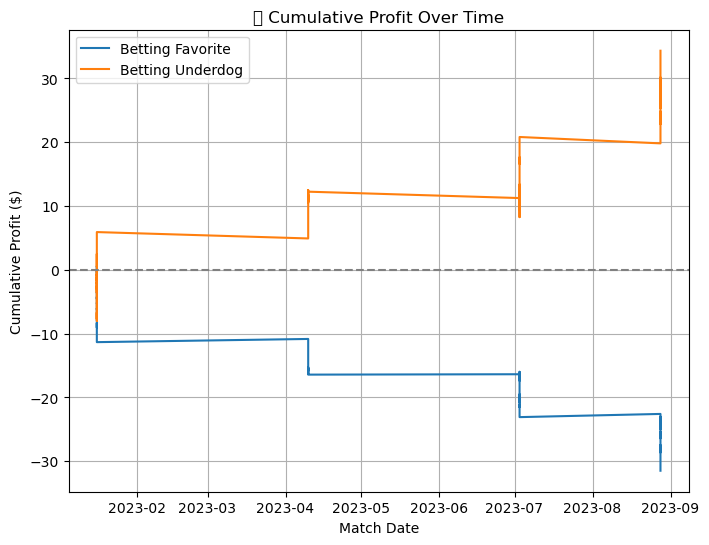

In [ ]:
merged_df = merged_df.sort_values(by='match_date')  # ensure chronological order
merged_df['cum_profit_fav'] = merged_df['profit_favorite'].cumsum()
merged_df['cum_profit_udg'] = merged_df['profit_underdog'].cumsum()

plt.figure(figsize=(8,6))
plt.plot(merged_df['match_date'], merged_df['cum_profit_fav'], label='Betting Favorite')
plt.plot(merged_df['match_date'], merged_df['cum_profit_udg'], label='Betting Underdog')
plt.axhline(0, color='gray', linestyle='--')
plt.title("💰 Cumulative Profit Over Time")
plt.xlabel("Match Date")
plt.ylabel("Cumulative Profit ($)")
plt.legend()
plt.grid(True)
plt.show()


/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/3330599840.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rank_upsets = merged_df.groupby('rank_bucket')['underdog_win'].mean().reset_index()


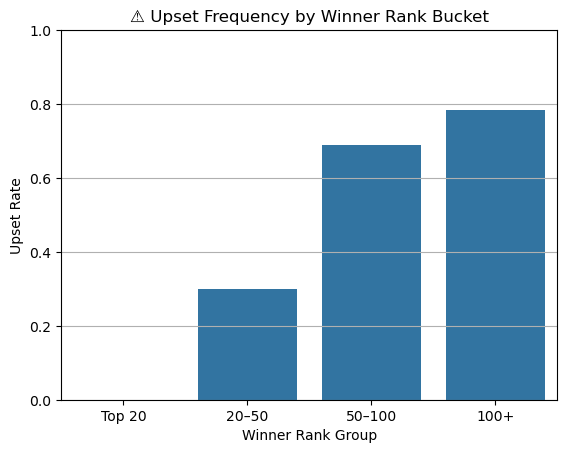

In [ ]:
merged_df['rank_bucket'] = pd.cut(merged_df['WRank'], bins=[0, 20, 50, 100, 1000],
                                   labels=['Top 20', '20–50', '50–100', '100+'])

rank_upsets = merged_df.groupby('rank_bucket')['underdog_win'].mean().reset_index()

sns.barplot(data=rank_upsets, x='rank_bucket', y='underdog_win')
plt.title("⚠️ Upset Frequency by Winner Rank Bucket")
plt.ylabel("Upset Rate")
plt.xlabel("Winner Rank Group")
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()


/Users/sadafvaziri/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


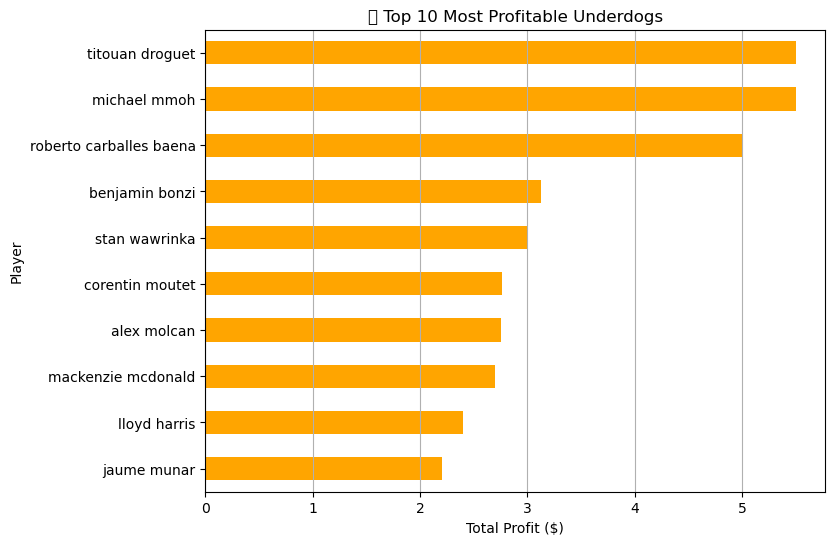

In [ ]:
# Filter for underdog wins
underdog_wins = merged_df[merged_df['underdog_win'] == 1].copy()

# Add profit column (assuming profit = max(B365 odds) - 1)
underdog_wins['profit'] = underdog_wins[['B365W', 'B365L']].max(axis=1) - 1

# Now aggregate and plot
top_underdogs = underdog_wins.groupby('Winner_clean_match')['profit'].sum().sort_values(ascending=False).head(10)

top_underdogs.plot(kind='barh', figsize=(8,6), color='orange')
plt.title("🔥 Top 10 Most Profitable Underdogs")
plt.xlabel("Total Profit ($)")
plt.ylabel("Player")
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.show()



In [ ]:
# Filter underdog wins
underdog_wins = merged_df[merged_df['underdog_win'] == 1].copy()

# Add profit column (max odds - 1)
underdog_wins['profit'] = underdog_wins[['B365W', 'B365L']].max(axis=1) - 1


OSError: [Errno 30] Read-only file system: '/top_10_loss_underdogs.png'

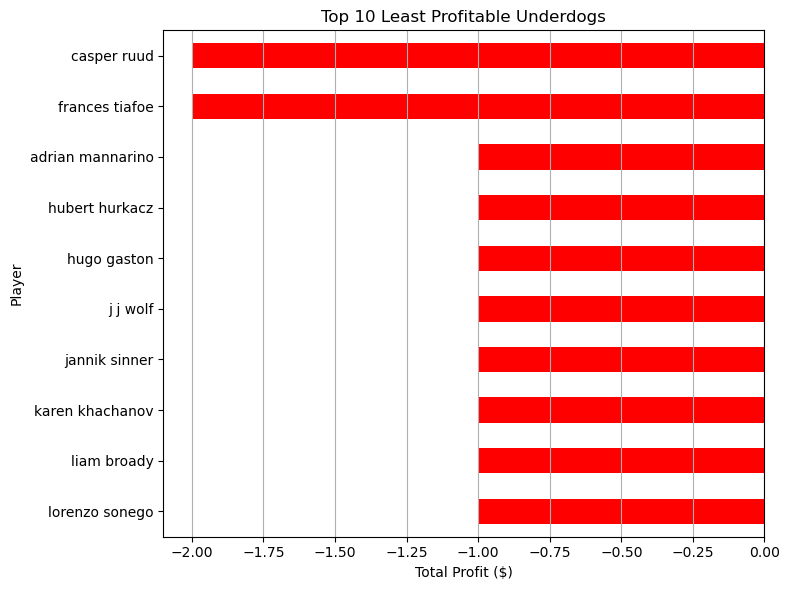

In [110]:
top_underdogs = underdog_wins.groupby('Winner_clean_match')['profit'].sum().sort_values(ascending=False).head(10)

## Also include underdogs who lost (profit = -1)
underdog_losses = merged_df[(merged_df['underdog_win'] == 0)].copy()
underdog_losses['profit'] = -1

# Combine all underdogs
all_underdogs = pd.concat([underdog_wins, underdog_losses], axis=0)

# Aggregate total profit by player
worst_underdogs = all_underdogs.groupby('Winner_clean_match')['profit'].sum().sort_values().head(10)

# Save and plot
plt.figure(figsize=(8,6))
worst_underdogs.plot(kind='barh', color='red')
plt.title("Top 10 Least Profitable Underdogs")
plt.xlabel("Total Profit ($)")
plt.ylabel("Player")
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.savefig("top_10_loss_underdogs.png")
plt.show()



In [116]:
# ===================== CONFIG (2024 only) =====================
MATCHES_2024_PATH = "/Users/sadafvaziri/Downloads/atp_matches_2024.csv"  # CSV
ODDS_2024_PATH    = "/Users/sadafvaziri/Downloads/2024.xlsx"             # Excel or CSV
FUZZY_THRESHOLD   = 75   # try 70 if overlap is low
# =============================================================

import os
import pandas as pd
from fuzzywuzzy import process

# optional, helps remove accents in names
try:
    from unidecode import unidecode
except ImportError:
    def unidecode(s): return s

# ---------------------- Helpers ----------------------
def load_table(path, sheet_name=None):
    """Load CSV or Excel automatically based on extension."""
    ext = os.path.splitext(path)[1].lower()
    if ext in [".csv", ".txt"]:
        return pd.read_csv(path)
    elif ext in [".xls", ".xlsx"]:
        return pd.read_excel(path, sheet_name=sheet_name)
    else:
        raise ValueError(f"Unsupported file type: {ext}")

def clean_text(s):
    if pd.isna(s): return s
    return unidecode(str(s)).strip().lower()

def normalize_date_series(s):
    return pd.to_datetime(s, errors='coerce').dt.strftime("%Y-%m-%d")

def short_name(full_name):
    """ 'Novak Djokovic' -> 'djokovic n.' """
    if pd.isna(full_name): return None
    parts = clean_text(full_name).split()
    if not parts: return None
    if len(parts) == 1: return parts[0]
    return f"{parts[-1]} {parts[0][0]}."

def prepare_matches_2024(df):
    df = df.copy()

    # match_date
    if 'match_date' in df.columns:
        df['match_date'] = pd.to_datetime(df['match_date'], errors='coerce')
    elif 'tourney_date' in df.columns:
        # Sackmann files: yyyymmdd → use as proxy if per-match date missing
        df['match_date'] = pd.to_datetime(df['tourney_date'].astype(str), errors='coerce')
    else:
        raise ValueError("Matches 2024: need 'match_date' or 'tourney_date'.")
    df['match_date_str'] = df['match_date'].dt.strftime("%Y-%m-%d")

    # tournament name
    if 'tourney_name_clean' in df.columns:
        df['tourney_name_clean'] = df['tourney_name_clean'].apply(clean_text)
    elif 'tourney_name' in df.columns:
        df['tourney_name_clean'] = df['tourney_name'].apply(clean_text)
    else:
        raise ValueError("Matches 2024: need 'tourney_name' or 'tourney_name_clean'.")

    # players (full names present in matches file)
    df['Winner_clean_match'] = df['winner_name'].apply(clean_text)
    df['Loser_clean_match']  = df['loser_name'].apply(clean_text)

    # match key
    df['match_key'] = (
        df['Winner_clean_match'] + "_" +
        df['Loser_clean_match']  + "_" +
        df['match_date_str']
    )
    return df

def build_name_map(df_matches):
    """Build short->full map and a full-name set for fuzzy fallback."""
    fullnames = pd.concat([df_matches['Winner_clean_match'],
                           df_matches['Loser_clean_match']]).dropna().unique().tolist()
    short2full = {}
    for full in fullnames:
        s = short_name(full)
        if s and s not in short2full:
            short2full[s] = full
    return short2full, set(fullnames)

def map_name_to_full(name, short2full, fullset, threshold=75):
    if pd.isna(name): return None
    s = clean_text(name)

    # direct full-name hit
    if s in fullset:
        return s
    # deterministic short→full
    if s in short2full:
        return short2full[s]
    # fuzzy fallback
    cand, score = process.extractOne(s, list(fullset))
    return cand if score >= threshold else None

def prepare_odds_2024(df_odds, short2full, fullset, fuzzy_threshold):
    df = df_odds.copy()

    # tournament name
    if 'tourney_name_clean' in df.columns:
        df['tourney_name_clean'] = df['tourney_name_clean'].apply(clean_text)
    elif 'Tournament' in df.columns:
        df['tourney_name_clean'] = df['Tournament'].apply(clean_text)
    else:
        raise ValueError("Odds 2024: need 'tourney_name_clean' or 'Tournament'.")

    # date
    if 'Date' not in df.columns:
        raise ValueError("Odds 2024: need 'Date'.")
    df['Date_str'] = normalize_date_series(df['Date'])

    # map initials → full names
    if 'Winner_clean' not in df.columns:
        df['Winner_clean'] = df['Winner'].apply(lambda x: map_name_to_full(x, short2full, fullset, fuzzy_threshold))
    if 'Loser_clean' not in df.columns:
        df['Loser_clean']  = df['Loser'] .apply(lambda x: map_name_to_full(x, short2full, fullset, fuzzy_threshold))

    # match key
    df['match_key'] = (
        df['Winner_clean'].fillna('') + "_" +
        df['Loser_clean'].fillna('')  + "_" +
        df['Date_str'].fillna('')
    )
    return df

def filter_common_tourneys(m_df, o_df):
    common = set(m_df['tourney_name_clean']) & set(o_df['tourney_name_clean'])
    return (m_df[m_df['tourney_name_clean'].isin(common)].copy(),
            o_df[o_df['tourney_name_clean'].isin(common)].copy(),
            common)

def compute_flags(df):
    """Add b365_favorite, favorite_won, underdog_win."""
    df = df.copy()
    wcol = 'Winner_clean_match' if 'Winner_clean_match' in df.columns else \
           ('Winner_clean_odds' if 'Winner_clean_odds' in df.columns else 'Winner_clean')
    lcol = 'Loser_clean_match' if 'Loser_clean_match' in df.columns else \
           ('Loser_clean_odds' if 'Loser_clean_odds' in df.columns else 'Loser_clean')
    df['b365_favorite'] = df.apply(lambda r: r[wcol] if r['B365W'] < r['B365L'] else r[lcol], axis=1)
    df['favorite_won']  = (df['b365_favorite'] == df[wcol]).astype(int)
    df['underdog_win']  = (df['favorite_won'] == 0).astype(int)
    return df

# ---------------------- Load Raw ----------------------
matches_2024_raw = load_table(MATCHES_2024_PATH)
odds_2024_raw    = load_table(ODDS_2024_PATH)

# If odds_2024_raw is a dict (because of sheet_name=None), grab the only sheet:
if isinstance(odds_2024_raw, dict):
    odds_2024_raw = list(odds_2024_raw.values())[0]

print("Matches 2024 shape:", matches_2024_raw.shape)
print("Odds 2024 shape:", odds_2024_raw.shape)


# ---------------------- Prepare & Merge ----------------------
M24 = prepare_matches_2024(matches_2024_raw)
short2full_24, fullset_24 = build_name_map(M24)
O24 = prepare_odds_2024(odds_2024_raw, short2full_24, fullset_24, FUZZY_THRESHOLD)

M24_f, O24_f, common24 = filter_common_tourneys(M24, O24)
print(f"🎾 2024 common tourneys: {len(common24)}")

# diagnostic: overlap of match keys
overlap24 = set(M24_f['match_key']) & set(O24_f['match_key'])
print(f"🔑 2024 overlapping match keys: {len(overlap24)}")

keep_odds_cols = [c for c in ['match_key','tourney_name_clean','Winner_clean','Loser_clean','Date',
                              'B365W','B365L','PSW','PSL','MaxW','MaxL','AvgW','AvgL'] if c in O24_f.columns]

merged_2024 = M24_f.merge(O24_f[keep_odds_cols], on='match_key', how='inner', suffixes=('_match','_odds'))
print("✅ 2024 merged shape:", merged_2024.shape)

# normalize column names if needed (keep matches-side distinct)
if 'Winner_clean_match' not in merged_2024.columns and 'Winner_clean' in merged_2024.columns:
    merged_2024.rename(columns={'Winner_clean':'Winner_clean_odds','Loser_clean':'Loser_clean_odds'}, inplace=True)

# flags
merged_2024 = compute_flags(merged_2024)
print("🏁 2024 favorites win rate:", round(merged_2024['favorite_won'].mean(), 3))
print("😲 2024 upset rate:", round(merged_2024['underdog_win'].mean(), 3))

# ---------------------- Optional append to 2023 ----------------------
# If your 2023 merged is already in memory as `merged_df`, we'll combine for you.
if 'merged_df' in globals():
    common_cols = sorted(list(set(merged_df.columns) | set(merged_2024.columns)))
    merged_all = pd.concat([merged_df.reindex(columns=common_cols),
                            merged_2024.reindex(columns=common_cols)], ignore_index=True)
    print("📦 Combined shape (existing 2023 + new 2024):", merged_all.shape)
else:
    merged_all = merged_2024.copy()
    print("📦 Using 2024 only. `merged_all` is ready for analysis.")


Matches 2024 shape: (3076, 49)
Odds 2024 shape: (2703, 36)
🎾 2024 common tourneys: 5
🔑 2024 overlapping match keys: 109
✅ 2024 merged shape: (109, 67)
🏁 2024 favorites win rate: 0.752
😲 2024 upset rate: 0.248
📦 Combined shape (existing 2023 + new 2024): (197, 121)


/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/1788474304.py:192: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_all = pd.concat([merged_df.reindex(columns=common_cols),
/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/1788474304.py:192: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_all = pd.concat([merged_df.reindex(columns=common_cols),


In [118]:

# Option 1: Save to your Downloads (Mac)
merged_all.to_csv("/Users/sadafvaziri/Downloads/merged_all_2023_2024.csv", index=False)

merged_all['match_date'] = pd.to_datetime(merged_all['match_date'])
merged_all['year'] = merged_all['match_date'].dt.year
merged_all[['year','favorite_won','underdog_win']].groupby('year').mean().round(3)


,favorite_won,underdog_win
year,,
2023,0.500,0.500
2024,0.752,0.248


In [ ]:

merged_all['match_date'] = pd.to_datetime(merged_all['match_date'])
merged_all['year'] = merged_all['match_date'].dt.year

# Quick year summary (what you showed)
year_summary = merged_all.groupby('year')[['favorite_won','underdog_win']].mean().round(3)
print(year_summary)


      favorite_won  underdog_win
year                            
2023         0.500         0.500
2024         0.752         0.248


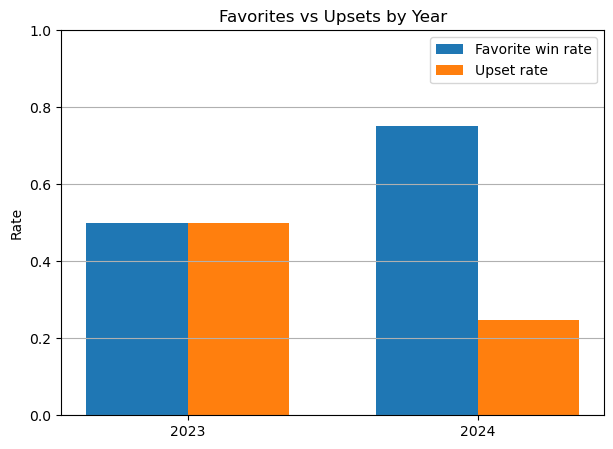

In [120]:
rates = merged_all.groupby('year')[['favorite_won','underdog_win']].mean()

plt.figure(figsize=(7,5))
x = np.arange(len(rates.index))
w = 0.35
plt.bar(x - w/2, rates['favorite_won'].values, width=w, label='Favorite win rate')
plt.bar(x + w/2, rates['underdog_win'].values, width=w, label='Upset rate')
plt.xticks(x, rates.index.astype(str))
plt.ylim(0,1)
plt.ylabel('Rate')
plt.title('Favorites vs Upsets by Year')
plt.legend()
plt.grid(True, axis='y')
plt.show()


In [121]:
# Counts by year
tab = merged_all.groupby('year')['favorite_won'].agg(['sum','count']).rename(columns={'sum':'wins','count':'n'})
print(tab)

wins_2023, n_2023 = tab.loc[2023, 'wins'], tab.loc[2023, 'n']
wins_2024, n_2024 = tab.loc[2024, 'wins'], tab.loc[2024, 'n']

# Two-proportion z-test
try:
    from statsmodels.stats.proportion import proportions_ztest
    count = np.array([wins_2024, wins_2023])
    nobs  = np.array([n_2024, n_2023])
    z, p = proportions_ztest(count, nobs, alternative='two-sided')
    print(f"Two-proportion z-test: z={z:.3f}, p-value={p:.5f}")
except Exception as e:
    # Manual approximate
    p1, p2 = wins_2024/n_2024, wins_2023/n_2023
    p_pool = (wins_2024 + wins_2023)/(n_2024 + n_2023)
    se = np.sqrt(p_pool*(1-p_pool)*(1/n_2024 + 1/n_2023))
    z = (p1 - p2)/se
    # Normal approx p-value
    from math import erf, sqrt
    p = 2*(1 - 0.5*(1 + erf(abs(z)/np.sqrt(2))))
    print(f"[Manual] Two-proportion z-test: z={z:.3f}, p-value={p:.5f}")


      wins    n
year           
2023    44   88
2024    82  109
Two-proportion z-test: z=3.667, p-value=0.00025


Top tournaments by sample size per year:


,tourney_name,year,n,fav_win_rate,upset_rate
0,Australian Open,2023,30,0.533333,0.466667
5,Us Open,2023,27,0.518519,0.481481
7,Wimbledon,2023,20,0.500000,0.500000
2,Monte Carlo Masters,2023,11,0.363636,0.636364
8,Wimbledon,2024,30,0.866667,0.133333
1,Australian Open,2024,26,0.730769,0.269231
6,Us Open,2024,26,0.807692,0.192308
4,Shanghai Masters,2024,16,0.500000,0.500000
3,Monte Carlo Masters,2024,11,0.727273,0.272727


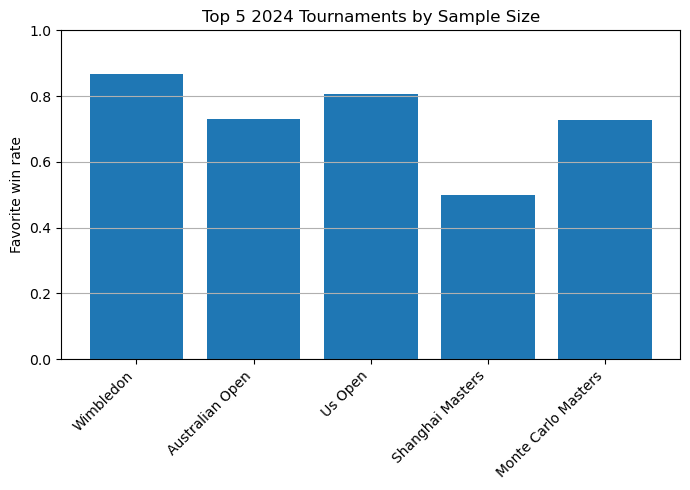

In [122]:
# Pick the cleanest tournament column available
tcol = 'tourney_name_clean' if 'tourney_name_clean' in merged_all.columns else (
       'tourney_name' if 'tourney_name' in merged_all.columns else 'Tournament')

tourney_year = (merged_all
    .groupby([tcol,'year'])
    .agg(n=('favorite_won','size'),
         fav_win_rate=('favorite_won','mean'),
         upset_rate=('underdog_win','mean'))
    .reset_index()
    .sort_values(['year','n'], ascending=[True,False])
)

print("Top tournaments by sample size per year:")
display(tourney_year.groupby('year').head(10))

# Optional: plot top 5 by n in 2024
top5_2024 = (tourney_year[tourney_year['year']==2024]
             .sort_values('n', ascending=False).head(5))
plt.figure(figsize=(7,5))
plt.bar(top5_2024[tcol], top5_2024['fav_win_rate'])
plt.xticks(rotation=45, ha='right')
plt.ylim(0,1)
plt.ylabel('Favorite win rate')
plt.title('Top 5 2024 Tournaments by Sample Size')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [123]:
# Most underdog wins (winners) by year
udw = merged_all[merged_all['underdog_win']==1]
name_col = 'Winner_clean_match' if 'Winner_clean_match' in merged_all.columns else 'Winner_clean_odds'

top_udg_by_year = (udw.groupby([name_col,'year'])
                     .size().reset_index(name='underdog_wins')
                     .sort_values(['year','underdog_wins'], ascending=[True,False]))
print("Top underdog winners by year:")
display(top_udg_by_year.groupby('year').head(10))

# Biggest underdog payoff (sum of profit) by year
udw = udw.copy()
udw['underdog_odds'] = udw[['B365W','B365L']].max(axis=1)
udw['profit'] = udw['underdog_odds'] - 1
payoff_by_year = (udw.groupby([name_col,'year'])['profit']
                    .sum().reset_index()
                    .sort_values(['year','profit'], ascending=[True,False]))
print("Most profitable underdogs by year (sum of profit):")
display(payoff_by_year.groupby('year').head(10))


Top underdog winners by year:


,Winner_clean_match,year,underdog_wins
10,benjamin bonzi,2023,2
17,corentin moutet,2023,2
43,mackenzie mcdonald,2023,2
55,stan wawrinka,2023,2
2,alex molcan,2023,1
5,alexei popyrin,2023,1
9,aslan karatsev,2023,1
11,botic van de zandschulp,2023,1
14,christopher eubanks,2023,1
16,constant lestienne,2023,1


Most profitable underdogs by year (sum of profit):


,Winner_clean_match,year,profit
46,michael mmoh,2023,5.50
58,titouan droguet,2023,5.50
52,roberto carballes baena,2023,5.00
10,benjamin bonzi,2023,3.13
55,stan wawrinka,2023,3.00
17,corentin moutet,2023,2.76
2,alex molcan,2023,2.75
43,mackenzie mcdonald,2023,2.70
42,lloyd harris,2023,2.40
35,jaume munar,2023,2.20


Profit comparison by year ($1 flat stake):


,year,n,fav_total_profit,fav_roi_per_bet,udg_total_profit,udg_roi_per_bet
0,2023,88,-31.48,-0.357727,34.34,0.390227
1,2024,109,1.61,0.014771,-42.76,-0.395926


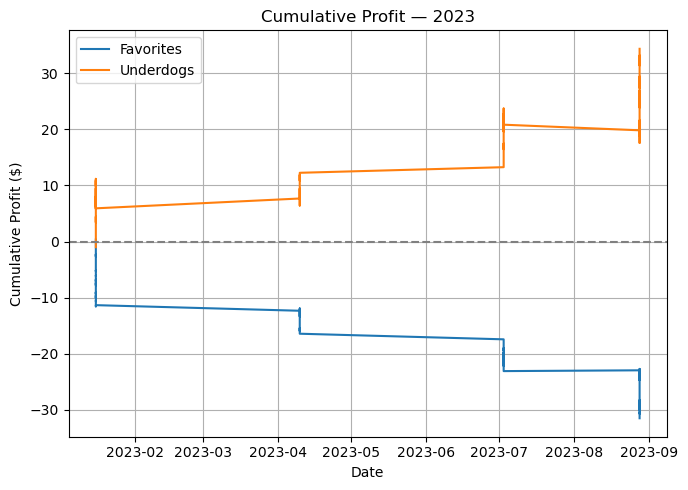

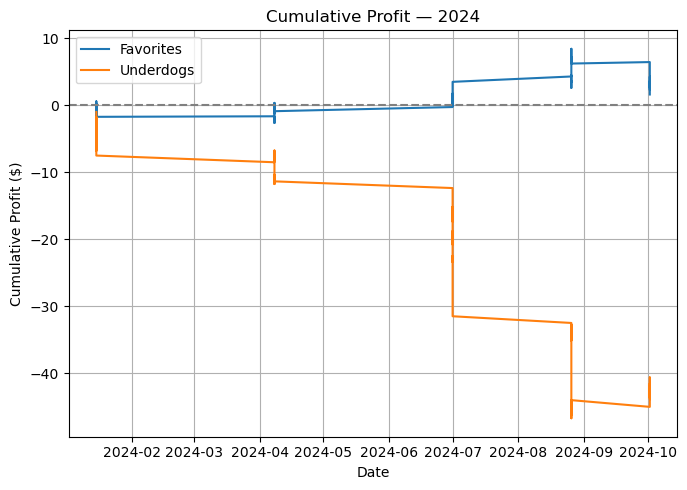

In [124]:
def bet_profit(row, strategy):
    if strategy == 'favorite':
        if row['favorite_won'] == 1:
            fav_odds = row['B365W'] if row['B365W'] < row['B365L'] else row['B365L']
            return fav_odds - 1
        return -1
    elif strategy == 'underdog':
        if row['underdog_win'] == 1:
            udg_odds = max(row['B365W'], row['B365L'])
            return udg_odds - 1
        return -1

res = []
for yr, dfy in merged_all.groupby('year'):
    dfy = dfy.sort_values('match_date').copy()
    dfy['profit_fav'] = dfy.apply(lambda r: bet_profit(r,'favorite'), axis=1)
    dfy['profit_udg'] = dfy.apply(lambda r: bet_profit(r,'underdog'), axis=1)
    res.append({
        'year': yr,
        'n': len(dfy),
        'fav_total_profit': dfy['profit_fav'].sum(),
        'fav_roi_per_bet': dfy['profit_fav'].mean(),
        'udg_total_profit': dfy['profit_udg'].sum(),
        'udg_roi_per_bet': dfy['profit_udg'].mean(),
    })

profit_table = pd.DataFrame(res)
print("Profit comparison by year ($1 flat stake):")
display(profit_table)

# Optional: cumulative profit lines per year
for yr, dfy in merged_all.groupby('year'):
    dfy = dfy.sort_values('match_date').copy()
    dfy['cum_fav'] = dfy.apply(lambda r: bet_profit(r,'favorite'), axis=1).cumsum()
    dfy['cum_udg'] = dfy.apply(lambda r: bet_profit(r,'underdog'), axis=1).cumsum()
    plt.figure(figsize=(7,5))
    plt.plot(dfy['match_date'], dfy['cum_fav'], label='Favorites')
    plt.plot(dfy['match_date'], dfy['cum_udg'], label='Underdogs')
    plt.axhline(0, ls='--', color='gray')
    plt.title(f'Cumulative Profit — {yr}')
    plt.xlabel('Date'); plt.ylabel('Cumulative Profit ($)')
    plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()


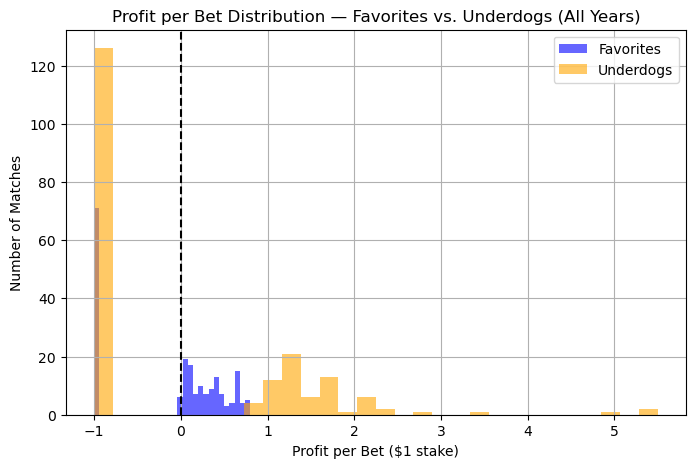

In [125]:
plt.figure(figsize=(8,5))
merged_all['profit_fav'] = merged_all.apply(lambda r: bet_profit(r,'favorite'), axis=1)
merged_all['profit_udg'] = merged_all.apply(lambda r: bet_profit(r,'underdog'), axis=1)

plt.hist(merged_all['profit_fav'], bins=30, alpha=0.6, label='Favorites', color='blue')
plt.hist(merged_all['profit_udg'], bins=30, alpha=0.6, label='Underdogs', color='orange')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Profit per Bet ($1 stake)')
plt.ylabel('Number of Matches')
plt.title('Profit per Bet Distribution — Favorites vs. Underdogs (All Years)')
plt.legend()
plt.grid(True)
plt.show()


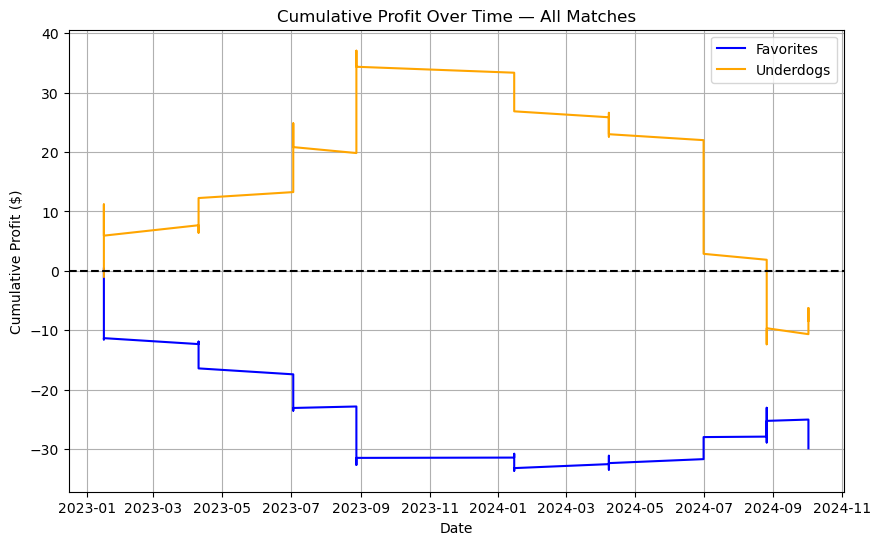

In [126]:
merged_all_sorted = merged_all.sort_values('match_date').copy()
merged_all_sorted['cum_fav'] = merged_all_sorted['profit_fav'].cumsum()
merged_all_sorted['cum_udg'] = merged_all_sorted['profit_udg'].cumsum()

plt.figure(figsize=(10,6))
plt.plot(merged_all_sorted['match_date'], merged_all_sorted['cum_fav'], label='Favorites', color='blue')
plt.plot(merged_all_sorted['match_date'], merged_all_sorted['cum_udg'], label='Underdogs', color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit ($)')
plt.title('Cumulative Profit Over Time — All Matches')
plt.legend()
plt.grid(True)
plt.show()


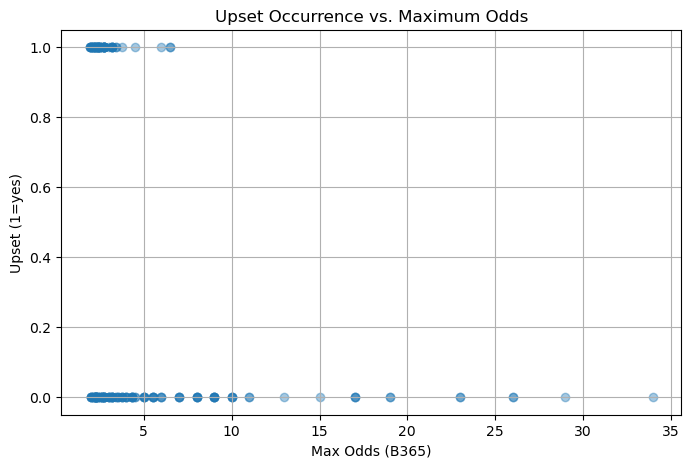

In [127]:
merged_all['max_odds'] = merged_all[['B365W','B365L']].max(axis=1)
plt.figure(figsize=(8,5))
plt.scatter(merged_all['max_odds'], merged_all['underdog_win'], alpha=0.4)
plt.xlabel('Max Odds (B365)')
plt.ylabel('Upset (1=yes)')
plt.title('Upset Occurrence vs. Maximum Odds')
plt.grid(True)
plt.show()


,match_date,Winner_clean_match,Loser_clean_match,max_odds,tourney_name_clean_match
65,2023-08-28,titouan droguet,lorenzo musetti,6.50,us open
56,2023-07-03,michael mmoh,felix auger aliassime,6.50,wimbledon
62,2023-08-28,roberto carballes baena,holger rune,6.00,us open
99,2024-01-15,flavio cobolli,nicolas jarry,4.50,australian open
28,2023-01-16,alex molcan,stan wawrinka,3.75,australian open
16,2023-01-16,lloyd harris,lorenzo musetti,3.40,australian open
174,2024-08-26,rinky hijikata,alejandro davidovich fokina,3.40,us open
87,2023-08-28,zhizhen zhang,j j wolf,3.20,us open
12,2023-01-16,jiri lehecka,borna coric,3.20,australian open
160,2024-08-26,francisco comesana,dominic stricker,3.20,us open


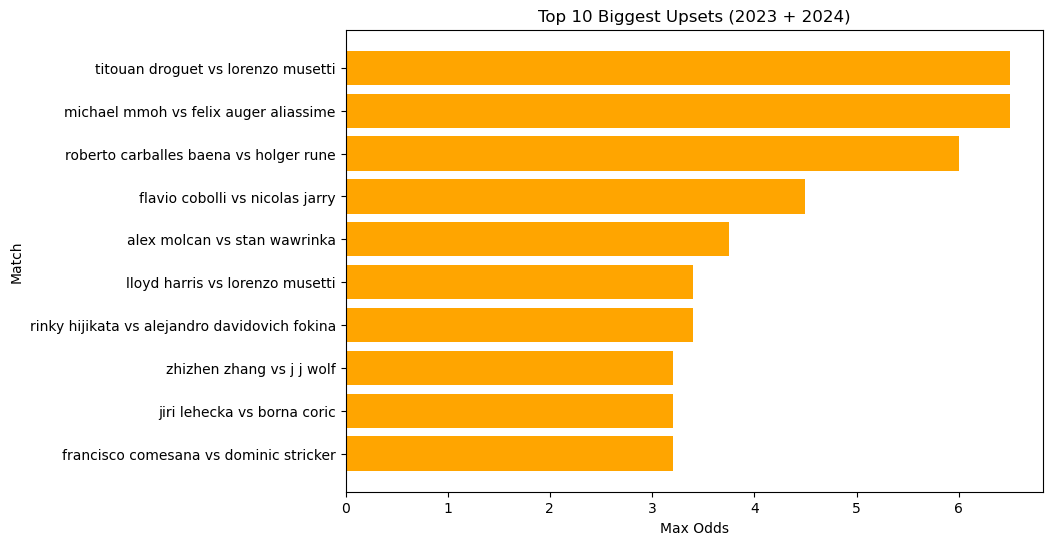

In [130]:
# --- Top 10 Biggest Upsets ---
# Calculate max odds from available odds columns
merged_all['max_odds'] = merged_all[['B365W', 'B365L']].max(axis=1)

# Filter for underdog wins only
extreme_upsets = merged_all[merged_all['underdog_win'] == 1]

# Sort by biggest odds and take top 10
extreme_upsets = extreme_upsets.sort_values('max_odds', ascending=False).head(10)

# Pick correct tournament column name
tourney_col = None
for col in ['tourney_name_clean_match', 'tourney_name_clean_odds', 'tourney_name_clean']:
    if col in extreme_upsets.columns:
        tourney_col = col
        break

# Show table
cols_to_show = ['match_date', 'Winner_clean_match', 'Loser_clean_match', 'max_odds', tourney_col]
display(extreme_upsets[cols_to_show])

# Plot chart
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.barh(
    extreme_upsets['Winner_clean_match'] + " vs " + extreme_upsets['Loser_clean_match'],
    extreme_upsets['max_odds'],
    color='orange'
)
plt.xlabel("Max Odds")
plt.ylabel("Match")
plt.title("Top 10 Biggest Upsets (2023 + 2024)")
plt.gca().invert_yaxis()
plt.show()


Top upsets — 2023


,match_date,Winner_clean_match,Loser_clean_match,max_odds,tourney_name_clean_match,label
65,2023-08-28,titouan droguet,lorenzo musetti,6.50,us open,titouan droguet vs lorenzo musetti — us open
56,2023-07-03,michael mmoh,felix auger aliassime,6.50,wimbledon,michael mmoh vs felix auger aliassime — wimbledon
62,2023-08-28,roberto carballes baena,holger rune,6.00,us open,roberto carballes baena vs holger rune — us open
28,2023-01-16,alex molcan,stan wawrinka,3.75,australian open,alex molcan vs stan wawrinka — australian open
16,2023-01-16,lloyd harris,lorenzo musetti,3.40,australian open,lloyd harris vs lorenzo musetti — australian open
87,2023-08-28,zhizhen zhang,j j wolf,3.20,us open,zhizhen zhang vs j j wolf — us open
12,2023-01-16,jiri lehecka,borna coric,3.20,australian open,jiri lehecka vs borna coric — australian open


Top upsets — 2024


,match_date,Winner_clean_match,Loser_clean_match,max_odds,tourney_name_clean_match,label
99,2024-01-15,flavio cobolli,nicolas jarry,4.50,australian open,flavio cobolli vs nicolas jarry — australian open
174,2024-08-26,rinky hijikata,alejandro davidovich fokina,3.40,us open,rinky hijikata vs alejandro davidovich fokina ...
150,2024-07-01,arthur cazaux,zizou bergs,3.20,wimbledon,arthur cazaux vs zizou bergs — wimbledon
109,2024-01-15,hugo grenier,alexandre muller,3.20,australian open,hugo grenier vs alexandre muller — australian ...
160,2024-08-26,francisco comesana,dominic stricker,3.20,us open,francisco comesana vs dominic stricker — us open
183,2024-10-02,roberto carballes baena,roberto bautista agut,2.75,shanghai masters,roberto carballes baena vs roberto bautista ag...
123,2024-04-08,sumit nagal,matteo arnaldi,2.75,monte carlo masters,sumit nagal vs matteo arnaldi — monte carlo ma...


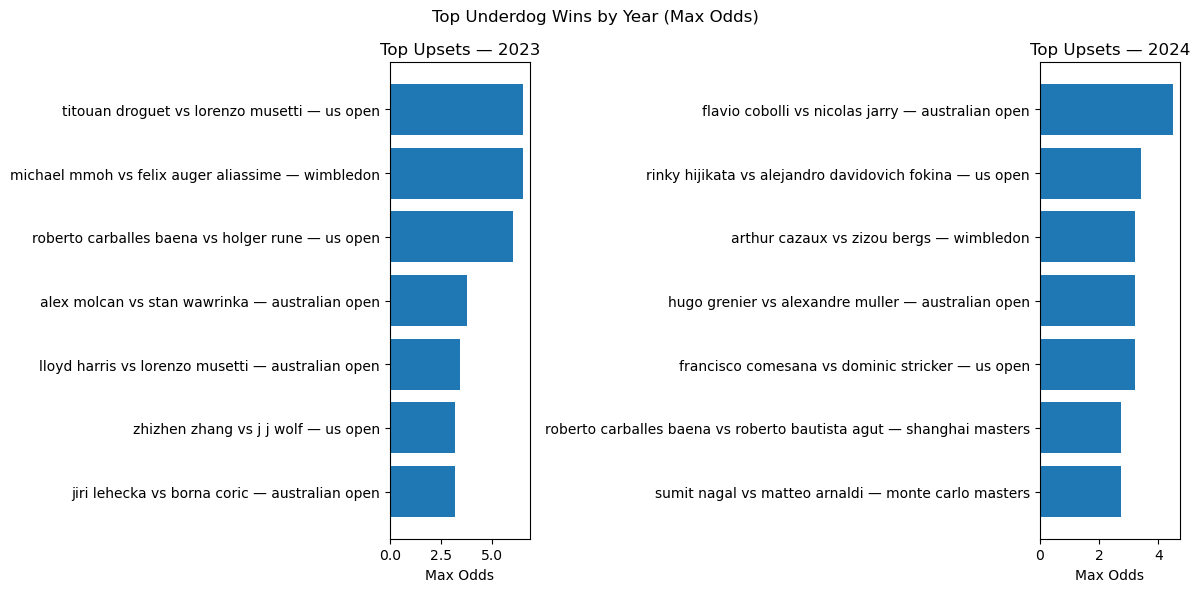

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure date/year exist
merged_all['match_date'] = pd.to_datetime(merged_all['match_date'])
if 'year' not in merged_all.columns:
    merged_all['year'] = merged_all['match_date'].dt.year

# Pick name/tournament columns that actually exist
wcol = next((c for c in ['Winner_clean_match','Winner_clean_odds','Winner_clean'] if c in merged_all.columns), None)
lcol = next((c for c in ['Loser_clean_match','Loser_clean_odds','Loser_clean'] if c in merged_all.columns), None)
tcol = next((c for c in ['tourney_name_clean_match','tourney_name_clean_odds','tourney_name_clean','tourney_name','Tournament'] if c in merged_all.columns), None)

assert wcol and lcol, "Couldn't find winner/loser name columns."

# Max odds per match (for the underdog)
merged_all['max_odds'] = merged_all[['B365W','B365L']].max(axis=1)

# Helper to get top N upsets for a year
def top_upsets_for_year(df, year, topn=7):
    d = df[(df['year']==year) & (df['underdog_win']==1)].copy()
    if d.empty:
        return d
    d = d.sort_values('max_odds', ascending=False).head(topn)
    # Label for display/plotting
    if tcol:
        d['label'] = d[wcol] + " vs " + d[lcol] + " — " + d[tcol]
    else:
        d['label'] = d[wcol] + " vs " + d[lcol]
    return d[['match_date', wcol, lcol, 'max_odds'] + ([tcol] if tcol else []) + ['label']]

top_2023 = top_upsets_for_year(merged_all, 2023, topn=7)
top_2024 = top_upsets_for_year(merged_all, 2024, topn=7)

# Show tables (optional)
print("Top upsets — 2023")
display(top_2023)
print("Top upsets — 2024")
display(top_2024)

# Plot side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=False, sharey=False)

# 2023
if not top_2023.empty:
    axes[0].barh(top_2023['label'], top_2023['max_odds'])
    axes[0].invert_yaxis()
    axes[0].set_title('Top Upsets — 2023')
    axes[0].set_xlabel('Max Odds')
else:
    axes[0].text(0.5, 0.5, 'No data', ha='center', va='center')
    axes[0].set_axis_off()

# 2024
if not top_2024.empty:
    axes[1].barh(top_2024['label'], top_2024['max_odds'])
    axes[1].invert_yaxis()
    axes[1].set_title('Top Upsets — 2024')
    axes[1].set_xlabel('Max Odds')
else:
    axes[1].text(0.5, 0.5, 'No data', ha='center', va='center')
    axes[1].set_axis_off()

fig.suptitle('Top Underdog Wins by Year (Max Odds)', y=0.98)
plt.tight_layout()
plt.show()


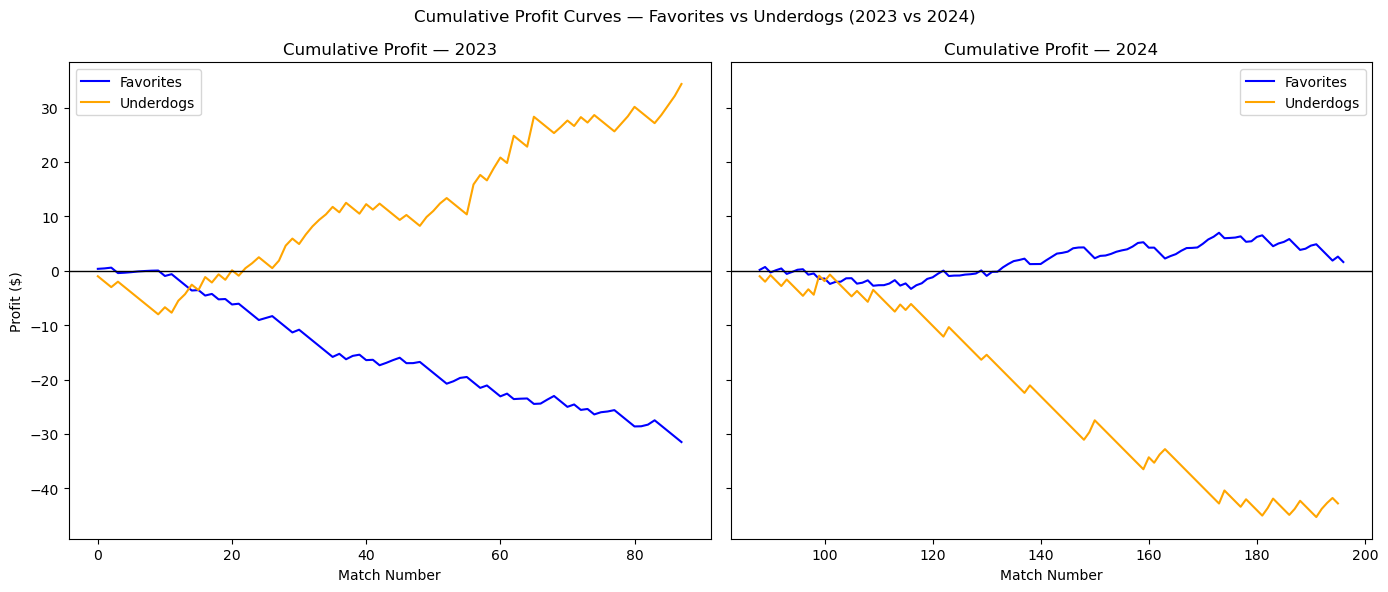

In [133]:


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i, year in enumerate([2023, 2024]):
    df_year = merged_all[merged_all['year'] == year].copy()
    if df_year.empty:
        axes[i].text(0.5, 0.5, 'No data', ha='center', va='center')
        axes[i].set_axis_off()
        continue

    # Calculate profit per match for $1 flat stake
    df_year['fav_profit'] = np.where(df_year['favorite_won'] == 1, 
                                     np.where(df_year['b365_favorite'] == df_year[wcol], df_year['B365W'] - 1, df_year['B365L'] - 1),
                                     -1)
    df_year['udg_profit'] = np.where(df_year['underdog_win'] == 1, 
                                     np.where(df_year['b365_favorite'] != df_year[wcol], df_year['B365W'] - 1, df_year['B365L'] - 1),
                                     -1)

    # Cumulative sum
    df_year['fav_cum_profit'] = df_year['fav_profit'].cumsum()
    df_year['udg_cum_profit'] = df_year['udg_profit'].cumsum()

    # Plot
    axes[i].plot(df_year.index, df_year['fav_cum_profit'], label='Favorites', color='blue')
    axes[i].plot(df_year.index, df_year['udg_cum_profit'], label='Underdogs', color='orange')
    axes[i].axhline(0, color='black', linewidth=1)
    axes[i].set_title(f"Cumulative Profit — {year}")
    axes[i].set_xlabel("Match Number")
    if i == 0:
        axes[i].set_ylabel("Profit ($)")
    axes[i].legend()

plt.suptitle("Cumulative Profit Curves — Favorites vs Underdogs (2023 vs 2024)", y=0.98)
plt.tight_layout()
plt.show()


  round_std  upset_rate    n
0      R128    0.348571  175
1       R64    0.454545   22


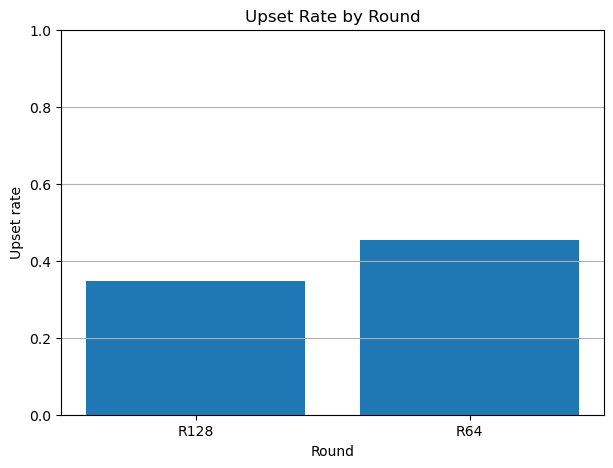

In [138]:
# Normalize round labels
round_map = {
    'R128':'R128','R64':'R64','R32':'R32','R16':'R16','QF':'QF','SF':'SF','F':'F',
    '1st Round':'R128','2nd Round':'R64','3rd Round':'R32','4th Round':'R16',
    'Quarterfinals':'QF','Semifinals':'SF','Finals':'F'
}
merged_all['round_std'] = merged_all['round'].astype(str).map(round_map).fillna(merged_all['round'].astype(str))

# Upset rate by round
by_round = (merged_all.groupby('round_std')['underdog_win']
            .agg(['mean','count']).rename(columns={'mean':'upset_rate','count':'n'})
            .reset_index()
            .sort_values('n', ascending=False))
print(by_round)

# Plot
import matplotlib.pyplot as plt
order = ['R128','R64','R32','R16','QF','SF','F']
by_round_plot = by_round.set_index('round_std').reindex(order).dropna().reset_index()
plt.figure(figsize=(7,5))
plt.bar(by_round_plot['round_std'], by_round_plot['upset_rate'])
plt.ylim(0,1); plt.ylabel('Upset rate'); plt.xlabel('Round')
plt.title('Upset Rate by Round'); plt.grid(True, axis='y'); plt.show()


Brier score (market): nan
Log loss (market):   nan


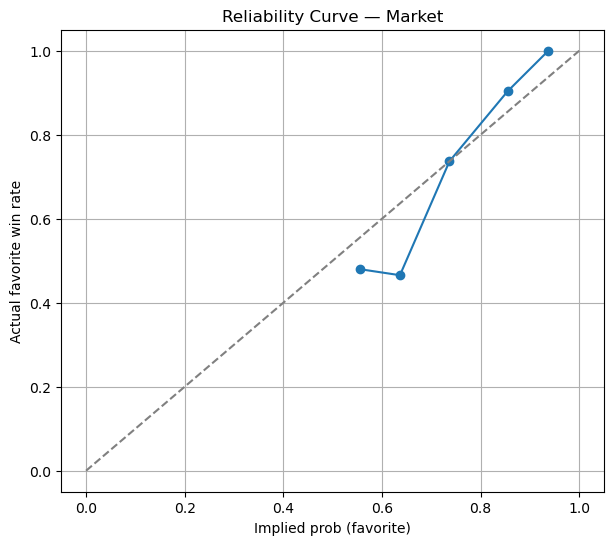

,p_hat,y_rate,n
bin,,,
5,0.554510,0.480000,50
6,0.636438,0.465517,58
7,0.736919,0.736842,38
8,0.854591,0.903226,31
9,0.937333,1.000000,19


In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Implied favorite probability from B365 (normalized to remove overround)
p_w = 1/merged_all['B365W']; p_l = 1/merged_all['B365L']
ps  = p_w + p_l
p_fav = np.where(merged_all['B365W'] < merged_all['B365L'], p_w/ps, p_l/ps)  # prob favorite wins
y = merged_all['favorite_won'].astype(int).values

# Scores
brier = np.mean((p_fav - y)**2)
eps = 1e-9
logloss = -np.mean(y*np.log(p_fav+eps) + (1-y)*np.log(1-p_fav+eps))
print(f"Brier score (market): {brier:.4f}")
print(f"Log loss (market):   {logloss:.4f}")

# Reliability (calibration) curve
bins = np.linspace(0,1,11)
bin_idx = np.digitize(p_fav, bins) - 1
df_rel = (pd.DataFrame({'p':p_fav,'y':y,'bin':bin_idx})
          .groupby('bin').agg(p_hat=('p','mean'), y_rate=('y','mean'), n=('y','size')).dropna())
plt.figure(figsize=(7,6))
plt.plot(df_rel['p_hat'], df_rel['y_rate'], marker='o')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('Implied prob (favorite)'); plt.ylabel('Actual favorite win rate')
plt.title('Reliability Curve — Market'); plt.grid(True); plt.show()
df_rel


/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/4238234973.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rank_eff = merged_all.groupby('rank_bucket')['favorite_won'].agg(['mean','count']).rename(


     rank_bucket  fav_win_rate   n
0  (-1000, -100]      1.000000  10
1    (-100, -50]      0.866667  15
2     (-50, -20]      0.733333  15
3       (-20, 0]      0.666667   3
4        (0, 20]      0.250000   8
5       (20, 50]      0.214286  14
6      (50, 100]      0.153846  13
7    (100, 1000]      0.100000  10


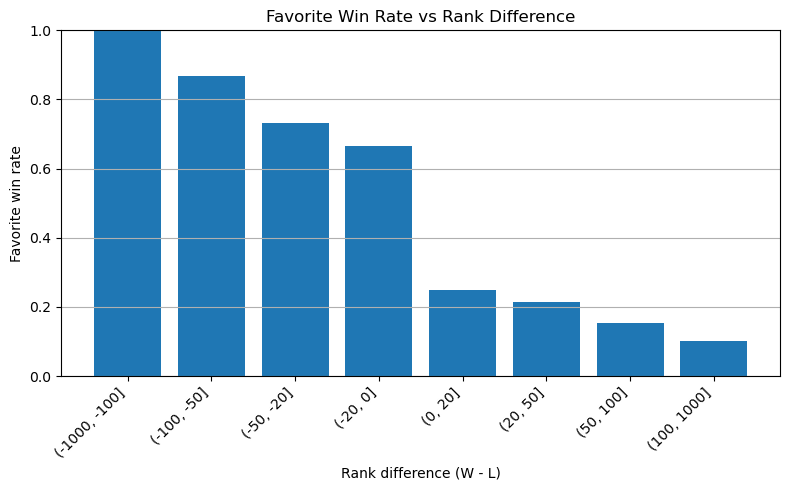

In [140]:
# Positive = winner had worse (higher) rank number; negative = winner higher-ranked
merged_all['rank_diff'] = merged_all['WRank'] - merged_all['LRank']
bins = [-1000,-100,-50,-20,0,20,50,100,1000]
merged_all['rank_bucket'] = pd.cut(merged_all['rank_diff'], bins=bins)

rank_eff = merged_all.groupby('rank_bucket')['favorite_won'].agg(['mean','count']).rename(
    columns={'mean':'fav_win_rate','count':'n'}).reset_index()
print(rank_eff)

plt.figure(figsize=(8,5))
plt.bar(rank_eff['rank_bucket'].astype(str), rank_eff['fav_win_rate'])
plt.xticks(rotation=45, ha='right')
plt.ylim(0,1); plt.ylabel('Favorite win rate'); plt.xlabel('Rank difference (W - L)')
plt.title('Favorite Win Rate vs Rank Difference'); plt.grid(True, axis='y'); plt.tight_layout(); plt.show()


  tourney_level  upset_rate    n
0             G    0.333333  159
1             M    0.473684   38


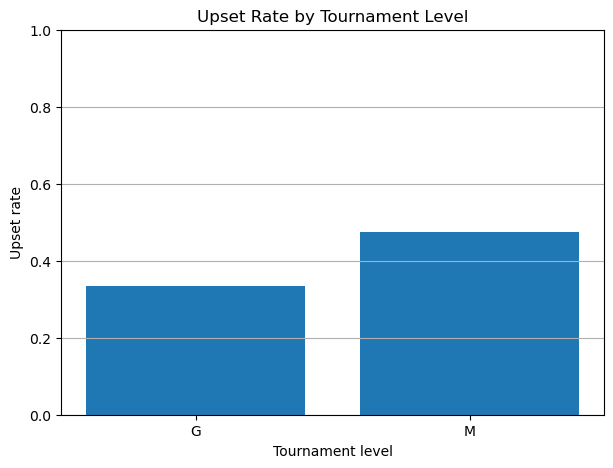

In [141]:
lvl_col = next((c for c in ['tourney_level','tourney_level_match','tourney_level_odds'] if c in merged_all.columns), None)
if lvl_col:
    by_lvl = (merged_all.groupby(lvl_col)['underdog_win']
              .agg(['mean','count']).rename(columns={'mean':'upset_rate','count':'n'})
              .reset_index().sort_values('n', ascending=False))
    print(by_lvl)

    plt.figure(figsize=(7,5))
    plt.bar(by_lvl[lvl_col], by_lvl['upset_rate'])
    plt.ylim(0,1); plt.ylabel('Upset rate'); plt.xlabel('Tournament level')
    plt.title('Upset Rate by Tournament Level'); plt.grid(True, axis='y'); plt.show()
else:
    print("No tournament level column found; skipping this chart.")


Final bankroll (1/4 Kelly on favorites): $nan


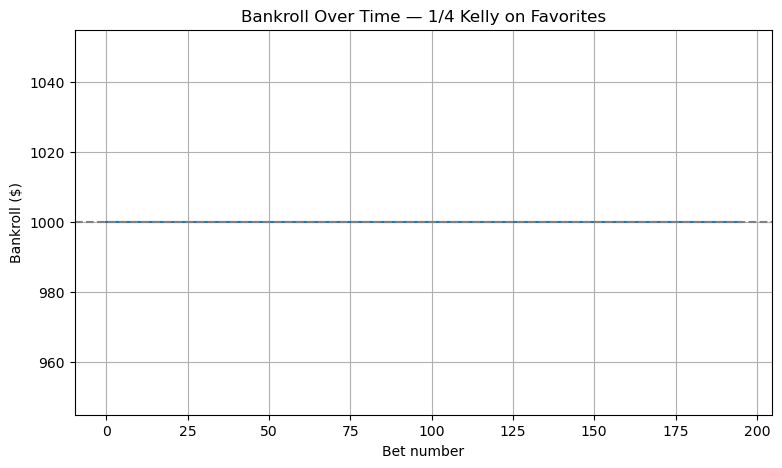

In [142]:
# Kelly fraction for favorites betting using market p̂
edge = p_fav - (1 - p_fav)/np.where(merged_all['B365W'] < merged_all['B365L'],
                                    merged_all['B365W']-1, merged_all['B365L']-1)
kelly_f = np.clip(edge, 0, 1)  # simple clamp

bank = 1000.0
bank_series = []
for i, row in merged_all.reset_index(drop=True).iterrows():
    # bet only on favorite
    stake = bank * (0.25 * kelly_f[i])  # 1/4 Kelly for sanity
    if stake < 0: stake = 0
    fav_odds = row['B365W'] if row['B365W'] < row['B365L'] else row['B365L']
    if row['favorite_won'] == 1:
        bank += stake * (fav_odds - 1)
    else:
        bank -= stake
    bank_series.append(bank)

print(f"Final bankroll (1/4 Kelly on favorites): ${bank_series[-1]:.2f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5))
plt.plot(bank_series)
plt.axhline(1000, color='gray', ls='--')
plt.title('Bankroll Over Time — 1/4 Kelly on Favorites')
plt.xlabel('Bet number'); plt.ylabel('Bankroll ($)'); plt.grid(True); plt.show()


   year        prev_upset  odds_change_from_last
0  2023  After normal win              -0.808571
1  2023   After upset win               0.324286
2  2024  After normal win              -0.168500
3  2024   After upset win               1.250667


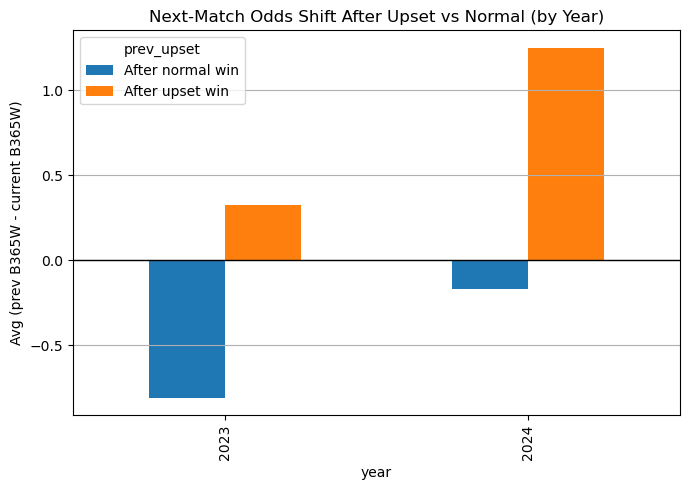

In [143]:
# Build previous-match features per player
merged_all = merged_all.sort_values(['Winner_clean_match','match_date']).copy()
merged_all['prev_b365w'] = merged_all.groupby('Winner_clean_match')['B365W'].shift(1)
merged_all['prev_upset'] = merged_all.groupby('Winner_clean_match')['underdog_win'].shift(1) == 1
merged_all['odds_change_from_last'] = merged_all['prev_b365w'] - merged_all['B365W']

res = (merged_all.dropna(subset=['odds_change_from_last','prev_upset'])
       .groupby(['year','prev_upset'])['odds_change_from_last'].mean().reset_index())
res['prev_upset'] = res['prev_upset'].map({True:'After upset win', False:'After normal win'})
print(res)

# Plot
pivot = res.pivot(index='year', columns='prev_upset', values='odds_change_from_last')
pivot.plot(kind='bar', figsize=(7,5))
plt.axhline(0, color='black', linewidth=1)
plt.ylabel('Avg (prev B365W - current B365W)')
plt.title('Next-Match Odds Shift After Upset vs Normal (by Year)')
plt.grid(True, axis='y'); plt.tight_layout(); plt.show()


   year        prev_upset          is_fav_current  odds_change
0  2023  After normal win  Next match as underdog    -1.152000
1  2023  After normal win  Next match as favorite     0.050000
2  2023   After upset win  Next match as underdog    -0.082500
3  2023   After upset win  Next match as favorite     0.866667
4  2024  After normal win  Next match as underdog    -0.972000
5  2024  After normal win  Next match as favorite    -0.007800
6  2024   After upset win  Next match as underdog     0.400000
7  2024   After upset win  Next match as favorite     1.381538


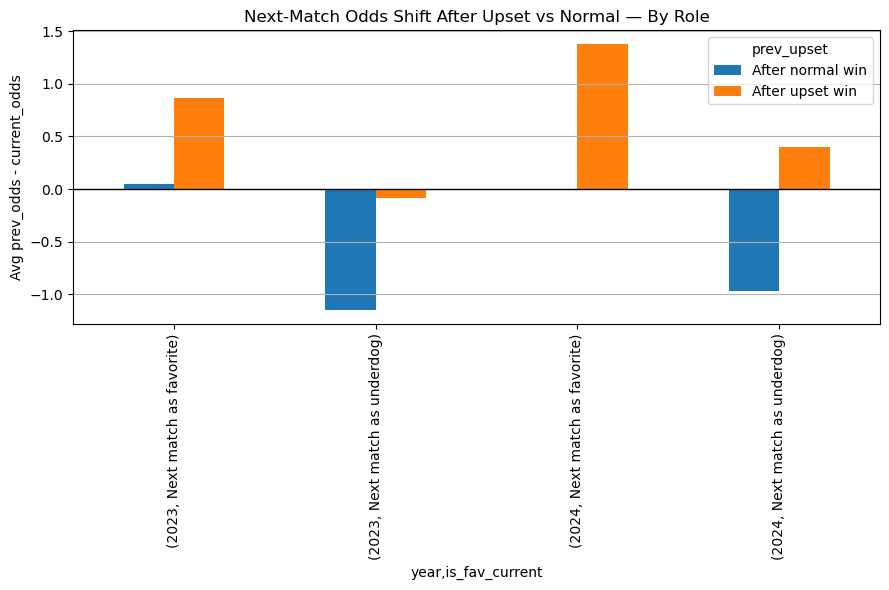

In [144]:
merged_all = merged_all.sort_values(['Winner_clean_match','match_date']).copy()

# For each match, previous match's odds and role (fav/udg)
merged_all['prev_fav_win'] = merged_all.groupby('Winner_clean_match')['favorite_won'].shift(1)
merged_all['prev_upset']   = merged_all.groupby('Winner_clean_match')['underdog_win'].shift(1)
merged_all['prev_odds']    = merged_all.groupby('Winner_clean_match')['B365W'].shift(1)

# Current match's role and odds
merged_all['is_fav_current'] = merged_all['B365W'] < merged_all['B365L']
merged_all['odds_change'] = merged_all['prev_odds'] - merged_all['B365W']

# Aggregate: after upset vs after normal win, split by current role
role_res = (merged_all.dropna(subset=['odds_change','prev_upset'])
            .groupby(['year','prev_upset','is_fav_current'])['odds_change']
            .mean().reset_index())

role_res['prev_upset'] = role_res['prev_upset'].map({1:'After upset win', 0:'After normal win'})
role_res['is_fav_current'] = role_res['is_fav_current'].map({True:'Next match as favorite', False:'Next match as underdog'})
print(role_res)

import matplotlib.pyplot as plt
pivot_role = role_res.pivot(index=['year','is_fav_current'], columns='prev_upset', values='odds_change')
pivot_role.plot(kind='bar', figsize=(9,6))
plt.axhline(0, color='black', linewidth=1)
plt.ylabel('Avg prev_odds - current_odds')
plt.title('Next-Match Odds Shift After Upset vs Normal — By Role')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [145]:
agg = merged_all.dropna(subset=['odds_change','prev_upset']).groupby(['year','prev_upset'])['odds_change']
shift_stats = agg.agg(['mean','median','count']).reset_index()
shift_stats['prev_upset'] = shift_stats['prev_upset'].map({1:'After upset',0:'After normal'})
print(shift_stats)


   year    prev_upset      mean  median  count
0  2023  After normal -0.808571   -0.84      7
1  2023   After upset  0.324286    0.30      7
2  2024  After normal -0.168500    0.00     60
3  2024   After upset  1.250667    0.95     15


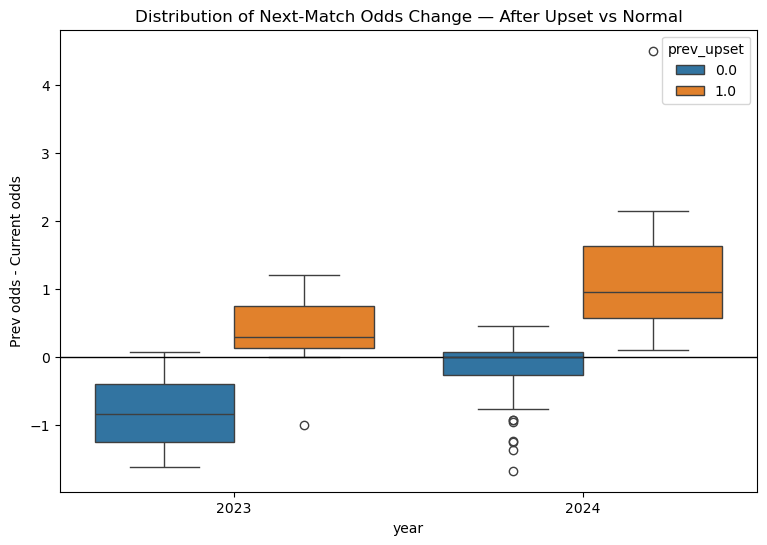

In [146]:
import seaborn as sns

plt.figure(figsize=(9,6))
sns.boxplot(data=merged_all, x='year', y='odds_change', hue='prev_upset')
plt.axhline(0, color='black', linewidth=1)
plt.ylabel('Prev odds - Current odds')
plt.title('Distribution of Next-Match Odds Change — After Upset vs Normal')
plt.show()


   year  prev_upset_1  odds_change_1  lag  prev_upset_2  odds_change_2  \
0  2023           0.0      -0.808571    1           NaN            NaN   
1  2023           1.0       0.324286    1           NaN            NaN   
2  2024           0.0      -0.168500    1           NaN            NaN   
3  2024           1.0       1.250667    1           NaN            NaN   
4  2023           NaN            NaN    2           0.0      -0.170000   
5  2024           NaN            NaN    2           0.0      -0.085714   
6  2024           NaN            NaN    2           1.0       0.759167   
7  2024           NaN            NaN    3           NaN            NaN   
8  2024           NaN            NaN    3           NaN            NaN   

   prev_upset_3  odds_change_3  
0           NaN            NaN  
1           NaN            NaN  
2           NaN            NaN  
3           NaN            NaN  
4           NaN            NaN  
5           NaN            NaN  
6           NaN            N

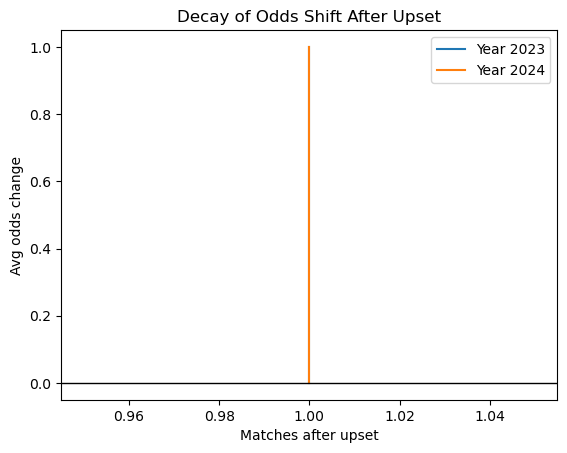

In [147]:
merged_all = merged_all.sort_values(['Winner_clean_match','match_date']).copy()

for lag in [1,2,3]:
    merged_all[f'prev_upset_{lag}'] = merged_all.groupby('Winner_clean_match')['underdog_win'].shift(lag)
    merged_all[f'prev_odds_{lag}']  = merged_all.groupby('Winner_clean_match')['B365W'].shift(lag)
    merged_all[f'odds_change_{lag}'] = merged_all[f'prev_odds_{lag}'] - merged_all['B365W']

lag_res = []
for lag in [1,2,3]:
    temp = (merged_all.dropna(subset=[f'odds_change_{lag}',f'prev_upset_{lag}'])
            .groupby(['year',f'prev_upset_{lag}'])[f'odds_change_{lag}']
            .mean().reset_index())
    temp['lag'] = lag
    lag_res.append(temp)

lag_res_df = pd.concat(lag_res, ignore_index=True)
lag_res_df[f'prev_upset_{lag}'] = lag_res_df[f'prev_upset_{lag}'].map({1:'After upset',0:'After normal'})

print(lag_res_df)

# Plot decay
for year in lag_res_df['year'].unique():
    df_year = lag_res_df[lag_res_df['year'] == year]
    plt.plot(df_year['lag'], df_year[df_year.columns[1]], label=f'Year {year}')
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Matches after upset')
plt.ylabel('Avg odds change')
plt.title('Decay of Odds Shift After Upset')
plt.legend()
plt.show()


prev_upset  year  lag  After normal  After upset
0           2023    1        -0.809        0.324
1           2023    2        -0.170          NaN
2           2024    1        -0.168        1.251
3           2024    2        -0.086        0.759
4           2024    3        -0.206        1.440


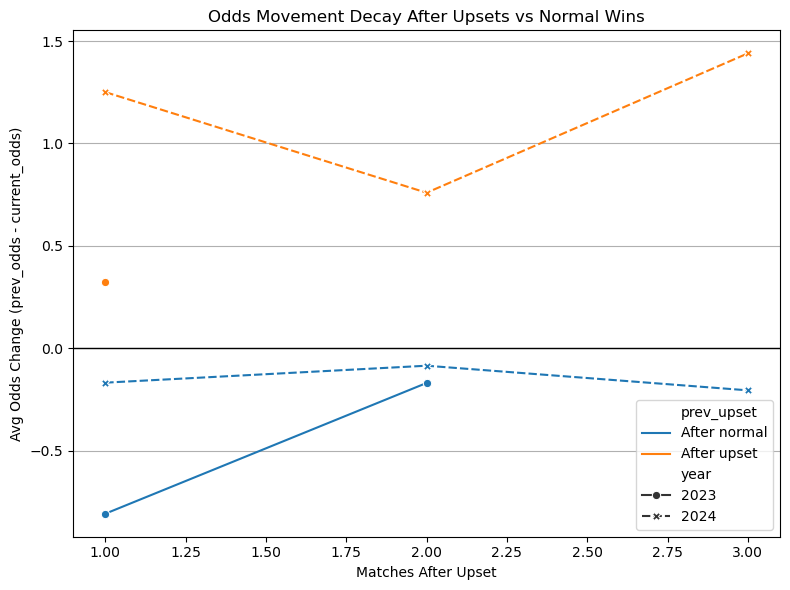

In [148]:
merged_all = merged_all.sort_values(['Winner_clean_match','match_date']).copy()

lag_res = []

for lag in [1, 2, 3]:
    # Shift upset flag & odds for lag
    merged_all[f'prev_upset_{lag}'] = merged_all.groupby('Winner_clean_match')['underdog_win'].shift(lag)
    merged_all[f'prev_odds_{lag}']  = merged_all.groupby('Winner_clean_match')['B365W'].shift(lag)
    merged_all[f'odds_change_{lag}'] = merged_all[f'prev_odds_{lag}'] - merged_all['B365W']
    
    # Aggregate
    temp = (
        merged_all
        .dropna(subset=[f'odds_change_{lag}', f'prev_upset_{lag}'])
        .groupby(['year', f'prev_upset_{lag}'])[f'odds_change_{lag}']
        .mean()
        .reset_index()
    )
    
    # Rename columns
    temp.columns = ['year', 'prev_upset', 'avg_odds_change']
    temp['prev_upset'] = temp['prev_upset'].map({1: 'After upset', 0: 'After normal'})
    temp['lag'] = lag
    
    lag_res.append(temp)

# Combine into one table
lag_res_df = pd.concat(lag_res, ignore_index=True)

# Pivot for table view
pivot_df = lag_res_df.pivot_table(index=['year','lag'], columns='prev_upset', values='avg_odds_change')
pivot_df = pivot_df.reset_index()
print(pivot_df.round(3))

# Plot decay
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.lineplot(data=lag_res_df, x='lag', y='avg_odds_change', hue='prev_upset', style='year', markers=True)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Matches After Upset')
plt.ylabel('Avg Odds Change (prev_odds - current_odds)')
plt.title('Odds Movement Decay After Upsets vs Normal Wins')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


        mean  median     std  count
year                               
2023  0.0515  0.0533  0.0069     88
2024  0.0501  0.0521  0.0071    108


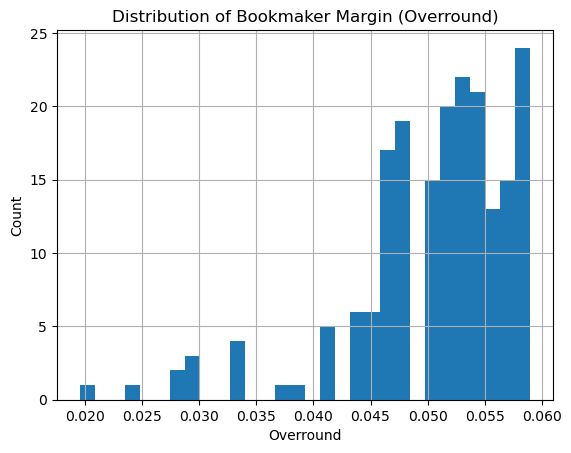

In [149]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

merged_all['overround'] = (1/merged_all['B365W']) + (1/merged_all['B365L']) - 1
print(merged_all.groupby('year')['overround'].agg(['mean','median','std','count']).round(4))

plt.hist(merged_all['overround'].dropna(), bins=30)
plt.title("Distribution of Bookmaker Margin (Overround)"); plt.xlabel("Overround"); plt.ylabel("Count"); plt.grid(True); plt.show()


/var/folders/43/bn9297xx5b35xcfsk5bcjf9c0000gn/T/ipykernel_6262/985691534.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year','p_bin'])['favorite_won']


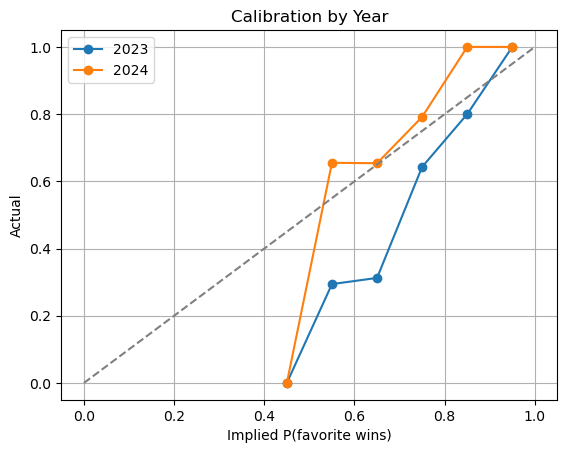

In [150]:
p_w = 1/merged_all['B365W']; p_l = 1/merged_all['B365L']; ps = p_w + p_l
p_fav = np.where(merged_all['B365W'] < merged_all['B365L'], p_w/ps, p_l/ps)

merged_all['p_bin'] = pd.cut(p_fav, np.linspace(0,1,11))
miscal = (merged_all
          .groupby(['year','p_bin'])['favorite_won']
          .agg(actual='mean', n='size')
          .reset_index())
miscal['implied'] = miscal['p_bin'].apply(lambda b: (b.left+b.right)/2)

for yr, dfy in miscal.groupby('year'):
    plt.plot(dfy['implied'], dfy['actual'], marker='o', label=str(yr))
plt.plot([0,1],[0,1],'--', color='gray'); plt.legend()
plt.title("Calibration by Year"); plt.xlabel("Implied P(favorite wins)"); plt.ylabel("Actual")
plt.grid(True); plt.show()


In [151]:
from statsmodels.stats.proportion import proportions_ztest

def ztest_round(r):
    d = merged_all[merged_all['round_std']==r]
    if d.empty: return None
    g = d.groupby('year')['favorite_won'].agg(['sum','count'])
    if len(g)<2: return None
    z,p = proportions_ztest(count=g['sum'].values, nobs=g['count'].values)
    return {'round': r, 'z': z, 'p': p, 'n2023': int(g.loc[2023,'count']), 'n2024': int(g.loc[2024,'count'])}

rounds = sorted(merged_all['round_std'].dropna().unique())
res = [ztest_round(r) for r in rounds]; res = [x for x in res if x]
pd.DataFrame(res).sort_values('p')


,round,z,p,n2023,n2024
0,R128,-3.246946,0.001167,77,98
1,R64,-1.712698,0.086768,11,11


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

merged_all['rank_diff'] = merged_all['WRank'] - merged_all['LRank']
merged_all['seed_diff'] = merged_all['winner_seed'].fillna(0) - merged_all['loser_seed'].fillna(0)

X = merged_all[['WRank','LRank','rank_diff','seed_diff']].replace([np.inf,-np.inf], np.nan).dropna()
y = merged_all.loc[X.index, 'favorite_won']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=42)

m_no_odds = LogisticRegression(max_iter=500).fit(X_train, y_train)
proba = m_no_odds.predict_proba(X_test)[:,1]; pred = (proba>=0.5).astype(int)

print("AUC:", roc_auc_score(y_test, proba).round(3), "Acc:", accuracy_score(y_test, pred).round(3))
pd.Series(m_no_odds.coef_[0], index=X.columns).sort_values(ascending=False)


AUC: 0.934 Acc: 0.778


LRank        0.018992
seed_diff    0.003249
WRank       -0.000328
rank_diff   -0.019320
dtype: float64

In [153]:
def eval_model(features):
    X = merged_all[features].dropna(); y = merged_all.loc[X.index, 'favorite_won']
    Xtr,Xte,ytr,yte = train_test_split(X,y, stratify=y, test_size=.3, random_state=42)
    mdl = LogisticRegression(max_iter=500).fit(Xtr,ytr)
    p = mdl.predict_proba(Xte)[:,1]; from sklearn.metrics import roc_auc_score, log_loss
    return {'features': features, 'AUC': roc_auc_score(yte,p), 'LogLoss': log_loss(yte,p)}

res = []
res.append(eval_model(['B365W','B365L']))
res.append(eval_model(['WRank','LRank','rank_diff','seed_diff']))
res.append(eval_model(['B365W','B365L','WRank','LRank','rank_diff','seed_diff']))
pd.DataFrame(res)


,features,AUC,LogLoss
0,"[B365W, B365L]",1.000000,0.113137
1,"[WRank, LRank, rank_diff, seed_diff]",0.934066,0.351910
2,"[B365W, B365L, WRank, LRank, rank_diff, seed_d...",1.000000,0.121837


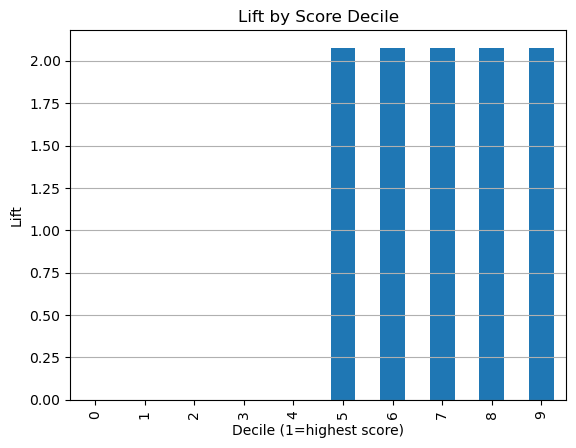

In [154]:
# Use combined model from #5
features = ['B365W','B365L','WRank','LRank','rank_diff','seed_diff']
X = merged_all[features].dropna(); y = merged_all.loc[X.index, 'favorite_won']
Xtr,Xte,ytr,yte = train_test_split(X,y, stratify=y, test_size=.3, random_state=42)
mdl = LogisticRegression(max_iter=500).fit(Xtr,ytr); score = mdl.predict_proba(Xte)[:,1]

df = pd.DataFrame({'y':yte, 'score':score}).sort_values('score', ascending=False).reset_index(drop=True)
df['decile'] = pd.qcut(df['score'], 10, labels=False, duplicates='drop')
lift = df.groupby('decile')['y'].mean() / df['y'].mean()
lift.plot(kind='bar'); plt.title("Lift by Score Decile"); plt.xlabel("Decile (1=highest score)"); plt.ylabel("Lift"); plt.grid(True, axis='y'); plt.show()


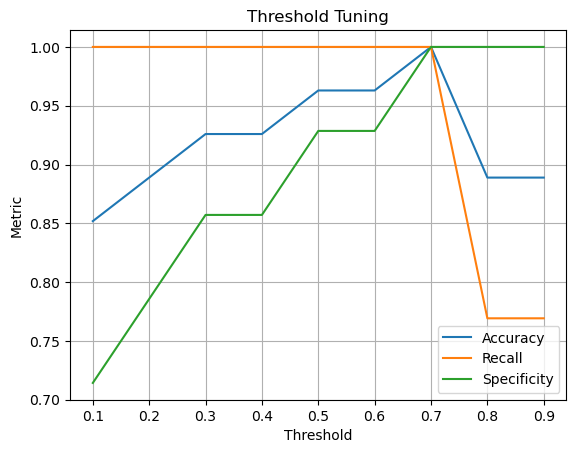

In [155]:
from sklearn.metrics import confusion_matrix

thr = np.linspace(0.1,0.9,9)
accs, sens, spec = [], [], []
for t in thr:
    pred = (score >= t).astype(int)
    tn,fp,fn,tp = confusion_matrix(yte, pred).ravel()
    accs.append((tp+tn)/(tp+tn+fp+fn))
    sens.append(tp/(tp+fn+1e-9))  # recall
    spec.append(tn/(tn+fp+1e-9))

plt.plot(thr, accs, label='Accuracy'); plt.plot(thr, sens, label='Recall'); plt.plot(thr, spec, label='Specificity')
plt.xlabel("Threshold"); plt.ylabel("Metric"); plt.title("Threshold Tuning"); plt.legend(); plt.grid(True); plt.show()


In [156]:
rng = np.random.default_rng(0)
def boot_ci(arr, B=5000):
    arr = np.asarray(arr); n=len(arr)
    stats = [rng.choice(arr, size=n, replace=True).mean() for _ in range(B)]
    return np.percentile(stats, [2.5, 97.5])

print("Overall fav win rate CI:", boot_ci(merged_all['favorite_won']))
for yr, dfy in merged_all.groupby('year'):
    print(yr, "CI:", boot_ci(dfy['favorite_won']))


Overall fav win rate CI: [0.57360406 0.70558376]
2023 CI: [0.39772727 0.60227273]
2024 CI: [0.66972477 0.82568807]


In [158]:
# Profit if you always bet $1 on winner’s side with their role (fav vs udg)
def per_match_profit(row):
    if row['favorite_won']==1:
        fav_odds = row['B365W'] if row['B365W'] < row['B365L'] else row['B365L']
        return fav_odds - 1
    else:
        return -1

merged_all['winner_profit'] = merged_all.apply(per_match_profit, axis=1)

name_col = next((c for c in ['Winner_clean_match','Winner_clean_odds','Winner_clean'] if c in merged_all.columns), None)
roi_by_player = merged_all.groupby(name_col)['winner_profit'].agg(total_profit='sum', n='size', roi_per_bet='mean').sort_values('total_profit', ascending=False)
print("Top value-creating players (by total profit if always backing them):")
display(roi_by_player.head(10))
print("Bottom (value-destroying):")
display(roi_by_player.tail(10))


Top value-creating players (by total profit if always backing them):


,total_profit,n,roi_per_bet
Winner_clean_match,,,
gael monfils,1.51,4,0.377500
sebastian ofner,1.47,2,0.735000
alejandro davidovich fokina,1.34,3,0.446667
felix auger aliassime,1.18,3,0.393333
denis shapovalov,1.15,3,0.383333
roberto bautista agut,1.01,3,0.336667
ugo humbert,0.99,4,0.247500
karen khachanov,0.96,3,0.320000
casper ruud,0.96,4,0.240000


Bottom (value-destroying):


,total_profit,n,roi_per_bet
Winner_clean_match,,,
rinky hijikata,-1.27,3,-0.423333
stan wawrinka,-1.38,3,-0.460000
tomas martin etcheverry,-1.38,3,-0.460000
roberto carballes baena,-1.50,3,-0.500000
alexei popyrin,-1.73,4,-0.432500
christopher eubanks,-1.75,3,-0.583333
arthur cazaux,-2.00,2,-1.000000
mackenzie mcdonald,-2.00,2,-1.000000
corentin moutet,-2.00,2,-1.000000
